# **Truck Delay Classification**

This project tackles a significant challenge in the logistics industry: delayed truck shipments. Such delays not only escalate operational costs but also diminish customer satisfaction. Ensuring timely delivery is crucial for meeting customer expectations and maintaining a competitive edge for logistics companies. 
By accurately predicting truck delays, companies can:
* Boost operational efficiency by optimizing resource allocation.
* Enhance customer satisfaction with more dependable delivery schedules.
* Streamline route planning to mitigate delays caused by traffic or adverse weather.
* Minimize costs associated with delays, such as penalties or customer compensation.
  
The project's goal is to address the issue of truck delay prediction. In this initial phase, PostgreSQL and MySQL on AWS RDS will be used for data storage, retrieval, and basic exploratory data analysis (EDA). Using Hopsworks feature store, we will construct a pipeline that encompasses data processing, feature engineering, and preparation for model development.

In [1]:
#!pip install psycopg2

## **Data Fetching**

In [2]:
import psycopg2
import pandas as pd

In [3]:
postgres_connection = psycopg2.connect(
    user="postgres",
    password="vaibhav123",
    host="truck-delay-classification-postgresql.ct6aeiame96o.us-east-2.rds.amazonaws.com",
    database="truckDB",
    port="5432")

### Retrieve City details data from database
*   Database - Postgres
*   Table name - routes_details

In [4]:
sql_query="select * from routes_details"
routes_df = pd.read_sql(sql_query,postgres_connection)

C:\Users\ahuja\AppData\Local\Temp\ipykernel_8760\297818078.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  routes_df = pd.read_sql(sql_query,postgres_connection)


In [5]:
routes_df

,route_id,origin_id,destination_id,distance,average_hours
0,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70
1,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96
2,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57
3,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86
4,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22
...,...,...,...,...,...
2347,R-cc900a65,C-594514f8,C-2e349ccd,8283.93,165.68
2348,R-64f64afb,C-594514f8,C-56b68559,272.90,5.46
2349,R-0e0ac567,C-594514f8,C-328bd8d3,172.74,3.45
2350,R-5ccd3200,C-594514f8,C-841ebdcb,960.93,19.22


### Retrieve Route details data from database
*   Database - Postgres
*   Table name - route_details

In [6]:
# Read data from the "routes_weather" table in the PostgreSQL database
route_weather = pd.read_sql("Select * from routes_weather", postgres_connection)

# Display the first few rows of the route weather dataframe
route_weather.head()


C:\Users\ahuja\AppData\Local\Temp\ipykernel_8760\1673182618.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  route_weather = pd.read_sql("Select * from routes_weather", postgres_connection)


,route_id,Date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,R-ada2a391,2019-01-01 00:00:00,30.0,11.0,Heavy snow,0.0,90,1.0,1010,0,0,0,0
1,R-ada2a391,2019-01-01 06:00:00,30.0,11.0,Heavy snow,0.0,91,3.0,1012,0,0,0,0
2,R-ada2a391,2019-01-02 00:00:00,28.0,11.0,Cloudy,0.0,91,4.0,1013,0,0,0,0
3,R-ada2a391,2019-01-02 06:00:00,27.0,11.0,Cloudy,0.0,92,6.0,1015,0,0,0,0
4,R-ada2a391,2019-01-03 00:00:00,27.0,9.0,Cloudy,0.0,93,6.0,1016,0,0,0,0


In [7]:
route_weather=route_weather.rename(columns={'Date':'date'})

In [8]:
#!pip install pymysql

In [9]:
import pymysql
mysql_connection = pymysql.connect(
    user = "admin",
    password = "vaibhav123",
    host = "truch-delay-classification-mysql.ct6aeiame96o.us-east-2.rds.amazonaws.com",
    database = "TruckDB"
)

In [10]:
cursor = mysql_connection.cursor()

cursor.execute("SHOW TABLES")

5

In [11]:
for table_name in cursor:
    print(table_name)

('city_weather',)
('drivers_details',)
('traffic_details',)
('truck_details',)
('truck_schedule_data',)


### Retrieve Driver details data from database
*   Database - MySQL
*   Table name - traffic_details

In [12]:
# Read data from the "traffic_details" table in the MySQL database
traffic_df = pd.read_sql("Select * from traffic_details", mysql_connection)

# Display the first few rows of the traffic dataframe
traffic_df.head()

C:\Users\ahuja\AppData\Local\Temp\ipykernel_8760\2632216887.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  traffic_df = pd.read_sql("Select * from traffic_details", mysql_connection)


,route_id,date,hour,no_of_vehicles,accident
0,R-ada2a391,2019-01-01,0,669.0,0
1,R-ada2a391,2019-01-01,100,628.0,0
2,R-ada2a391,2019-01-01,200,516.0,0
3,R-ada2a391,2019-01-01,300,582.0,0
4,R-ada2a391,2019-01-01,400,564.0,0


### Retrieve Truck details data from database
*   Database - MySQL
*   Table name - truck_details

In [13]:
# Read data from the "truck_details" table in the MySQL database
trucks_df = pd.read_sql("Select * from truck_details", mysql_connection)

# Display the first few rows of the trucks dataframe
trucks_df.head()

C:\Users\ahuja\AppData\Local\Temp\ipykernel_8760\3167258390.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  trucks_df = pd.read_sql("Select * from truck_details", mysql_connection)


,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
0,42302347,10,3000.0,17,gas
1,27867488,14,10000.0,22,diesel
2,13927774,8,10000.0,19,gas
3,69577118,8,20000.0,19,gas
4,28650047,10,4000.0,21,diesel


### Retrieve Driver details data from database
*   Database - MySQL
*   Table name - city_weather

In [14]:
# Read data from the "city_weather" table in the MySQL database
weather_df = pd.read_sql("Select * from city_weather", mysql_connection)

# Display the first few rows of the weather dataframe
weather_df.head()

C:\Users\ahuja\AppData\Local\Temp\ipykernel_8760\908420470.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  weather_df = pd.read_sql("Select * from city_weather", mysql_connection)


,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,C-927ceb5e,2019-01-01,0,30.0,11.0,Light snow,0.0,86,6.0,1019.0,0.0,0.0,0.0,0.0
1,C-927ceb5e,2019-01-01,100,28.0,12.0,Light snow,0.0,86,5.0,1021.0,0.0,0.0,0.0,0.0
2,C-927ceb5e,2019-01-01,200,28.0,13.0,Moderate snow,0.0,85,4.0,1022.0,0.0,0.0,0.0,0.0
3,C-927ceb5e,2019-01-01,300,28.0,14.0,Moderate snow,0.0,84,3.0,1024.0,0.0,0.0,0.0,0.0
4,C-927ceb5e,2019-01-01,400,28.0,13.0,Moderate snow,0.0,84,3.0,1025.0,0.0,0.0,0.0,0.0


In [15]:
# Read data from the "truck_schedule_data" table in the MySQL database
schedule_df = pd.read_sql("Select * from truck_schedule_data", mysql_connection)

# Display the first few rows of the schedule dataframe
schedule_df.head()

C:\Users\ahuja\AppData\Local\Temp\ipykernel_8760\1694698670.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schedule_df = pd.read_sql("Select * from truck_schedule_data", mysql_connection)


,truck_id,route_id,departure_date,estimated_arrival,delay
0,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:13:12.,0
1,59856374,R-29ea762e,2019-01-01 07:00:00,2019-01-02 04:01:12.,0
2,12602955,R-a3d67783,2019-01-01 07:00:00,2019-01-01 07:45:36.,0
3,46619422,R-31ec9310,2019-01-01 07:00:00,2019-01-01 20:46:48.,0
4,10140178,R-a07c5dbd,2019-01-01 07:00:00,2019-01-01 21:34:11.,0


### Retrieve Driver details data from database
*   Database - MySQL
*   Table name - driver_details

Driver's Data Analysis

In [18]:
drivers_df = pd.read_sql("select * from drivers_details",mysql_connection)
drivers_df.head()

C:\Users\ahuja\AppData\Local\Temp\ipykernel_8760\1789072344.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  drivers_df = pd.read_sql("select * from drivers_details",mysql_connection)


,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,d9f30553-6,Daniel Marks,male,47,5,proactive,7,42302347,62.22
1,82de7bb8-2,Clifford Carr,male,47,14,proactive,4,27867488,60.89
2,7e789842-4,Terry Faulkner MD,male,41,9,conservative,2,13927774,53.67
3,b2555587-8,Brendan Jacobs,male,44,10,proactive,2,69577118,59.82
4,b2e58421-d,Vincent Davis,male,41,10,proactive,7,28650047,62.65


In [19]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driver_id          1300 non-null   object 
 1   name               1300 non-null   object 
 2   gender             1277 non-null   object 
 3   age                1300 non-null   int64  
 4   experience         1300 non-null   int64  
 5   driving_style      1248 non-null   object 
 6   ratings            1300 non-null   int64  
 7   vehicle_no         1300 non-null   int64  
 8   average_speed_mph  1300 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 91.5+ KB


In [20]:
drivers_df.describe(include = 'all')

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
count,1300,1300,1277,1300.000000,1300.000000,1248,1300.000000,1.300000e+03,1300.000000
unique,1300,1274,2,NaN,NaN,2,NaN,NaN,NaN
top,d9f30553-6,Michael Parker,male,NaN,NaN,proactive,NaN,NaN,NaN
freq,1,3,1198,NaN,NaN,648,NaN,NaN,NaN
mean,NaN,NaN,NaN,47.814615,11.988462,NaN,5.633846,3.263242e+07,53.262854
std,NaN,NaN,NaN,4.973240,6.951765,NaN,2.137266,2.205390e+07,8.504282
min,NaN,NaN,NaN,28.000000,-8.000000,NaN,2.000000,1.000839e+07,29.150000
25%,NaN,NaN,NaN,45.000000,7.000000,NaN,4.000000,1.817244e+07,45.427500
50%,NaN,NaN,NaN,48.000000,11.000000,NaN,6.000000,2.584212e+07,57.340000
75%,NaN,NaN,NaN,51.000000,17.000000,NaN,8.000000,3.340052e+07,60.350000


## **Exploratory Data Analysis**

In [21]:
import seaborn as sns

In [22]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Drivers ratings by gender')

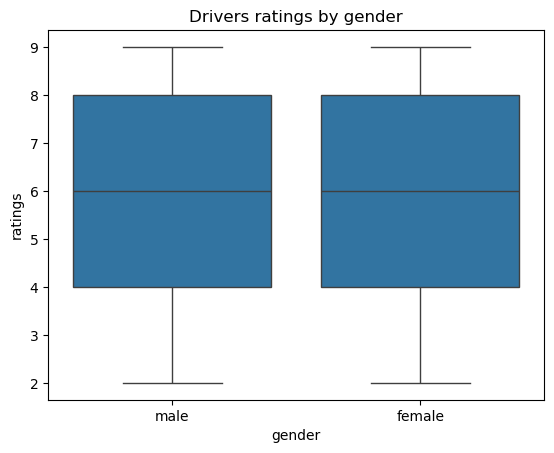

In [23]:
#boxplot between gender and rating

sns.boxplot(x="gender",y="ratings",data=drivers_df)
plt.title("Drivers ratings by gender")

<Axes: xlabel='ratings', ylabel='average_speed_mph'>

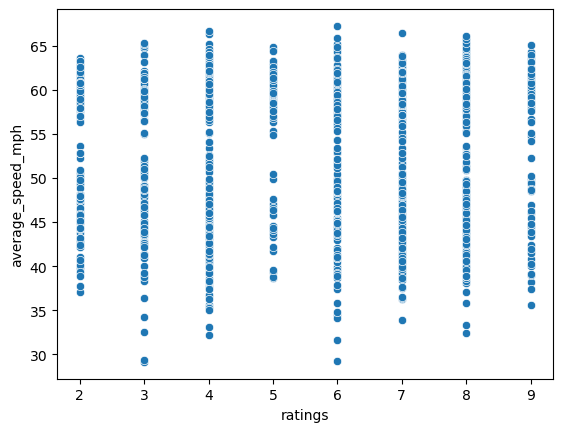

In [24]:
sns.scatterplot(x = "ratings", y = "average_speed_mph", data=drivers_df)

## Distribution Plots

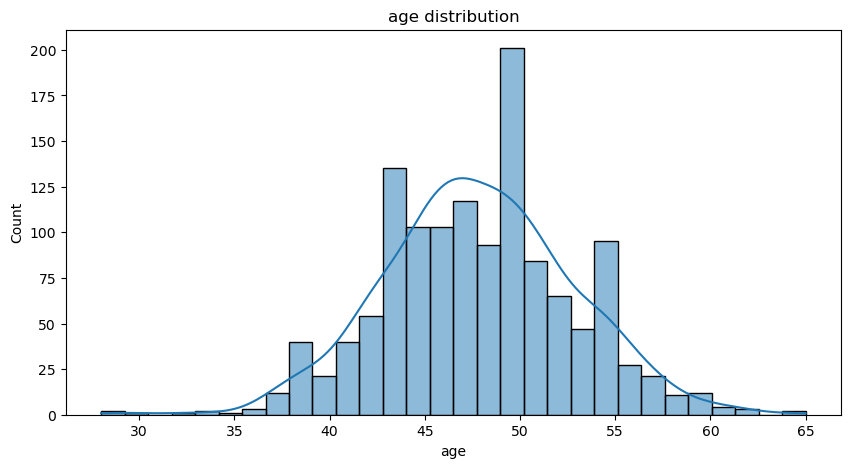

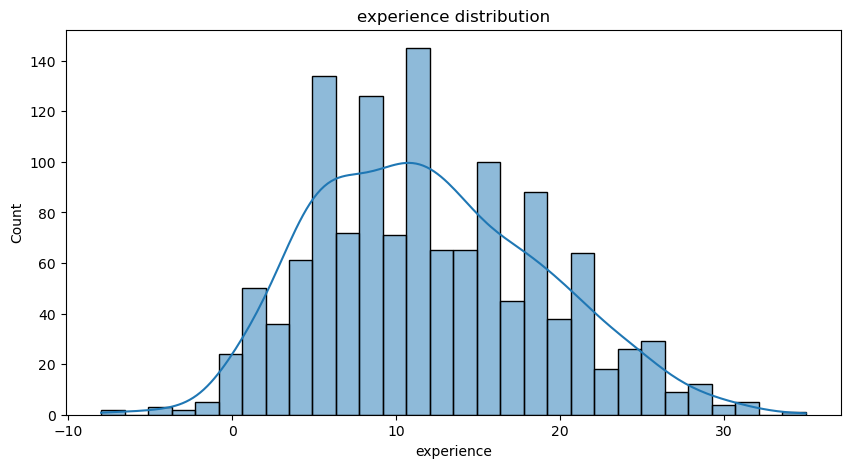

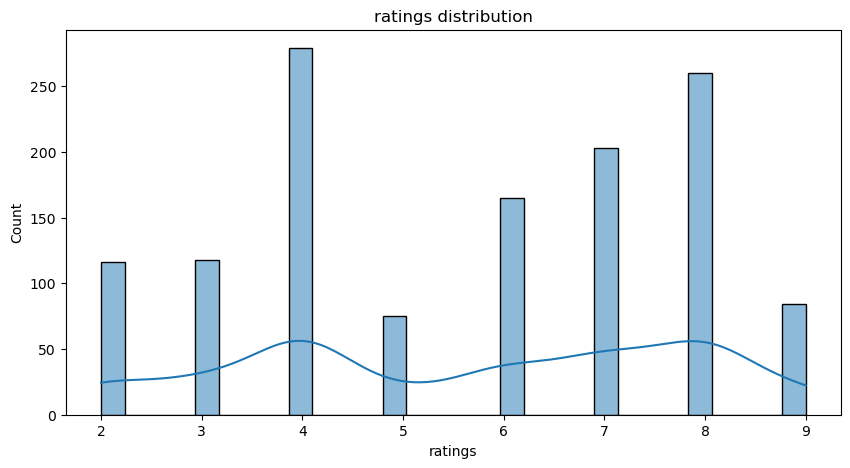

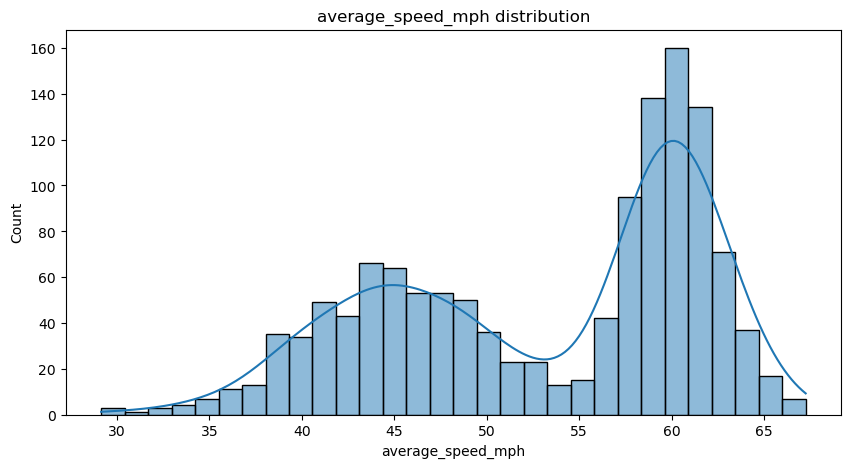

In [25]:
#list of numerical columns of visualize
drivers_num_cols = ['age','experience','ratings','average_speed_mph']

for col in drivers_num_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(drivers_df[col], bins=30, kde=True)
    plt.title(f'{col} distribution')
    plt.xlabel(f'{col}')
    plt.show()

#### Age:

**Observation:** The age distribution of drivers is approximately normal, with most drivers aged between 45 and 50. While older drivers often bring more experience, they may also face higher risks of fatigue or health-related issues.

**Recommendations:** Assign routes based on experience and health conditions, ensuring that longer or more complex routes are manageable to prevent delays.

Implement rest break policies, adhere to maximum working hour regulations, and provide training on driving techniques to reduce fatigue and enhance safety.


#### Experience:
**Observation:** Driver experience is right-skewed, with most drivers having 5 to 50 years of experience.

**Recommendations:** Analyze performance metrics across experience levels to identify correlations with efficiency and optimize route assignments.
Use insights from this analysis to tailor assignments, ensuring experienced drivers are matched to routes where their skills are most beneficial.


#### Ratings:
**Observation:** A significant number of drivers have ratings below 5 out of 10, indicating potential issues with performance or customer satisfaction.

**Recommendations:** Investigate the causes of low ratings and address them through targeted training or support.
Offer incentives to drivers to improve performance and ratings, thereby enhancing customer satisfaction.


#### Average Speed:
**Observation:** The average speed shows a bimodal distribution, with peaks at 45 mph and 60 mph, reflecting two distinct driving styles.

**Recommendations:** Categorize drivers based on their speed behavior and analyze the impact on delivery times, fuel efficiency, and safety.
Develop training programs and driving style guidelines to promote optimal driving habits for improved efficiency and safety.

### Truck's Detail Analysis

In [27]:
truck_df = pd.read_sql("select * from truck_details", mysql_connection)
truck_df

C:\Users\ahuja\AppData\Local\Temp\ipykernel_8760\3376242195.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  truck_df = pd.read_sql("select * from truck_details", mysql_connection)


,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
0,42302347,10,3000.0,17,gas
1,27867488,14,10000.0,22,diesel
2,13927774,8,10000.0,19,gas
3,69577118,8,20000.0,19,gas
4,28650047,10,4000.0,21,diesel
...,...,...,...,...,...
1295,17792974,11,4000.0,22,diesel
1296,17248432,11,6000.0,22,diesel
1297,21865328,10,3000.0,15,gas
1298,33564827,11,15000.0,24,diesel


In [28]:
truck_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   truck_id              1300 non-null   int64  
 1   truck_age             1300 non-null   int64  
 2   load_capacity_pounds  1243 non-null   float64
 3   mileage_mpg           1300 non-null   int64  
 4   fuel_type             1300 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 50.9+ KB


In [29]:
truck_df.describe(include="all")

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
count,1.300000e+03,1300.000000,1243.000000,1300.000000,1300
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,diesel
freq,NaN,NaN,NaN,NaN,692
mean,3.263242e+07,9.513077,8610.619469,20.784615,NaN
std,2.205390e+07,2.039030,5583.759795,3.655876,NaN
min,1.000839e+07,3.000000,3000.000000,11.000000,NaN
25%,1.817244e+07,8.000000,4000.000000,18.000000,NaN
50%,2.584212e+07,10.000000,6000.000000,21.000000,NaN
75%,3.340052e+07,11.000000,15000.000000,24.000000,NaN


In [30]:
truck_df.fuel_type.value_counts()

fuel_type
diesel    692
gas       568
           40
Name: count, dtype: int64

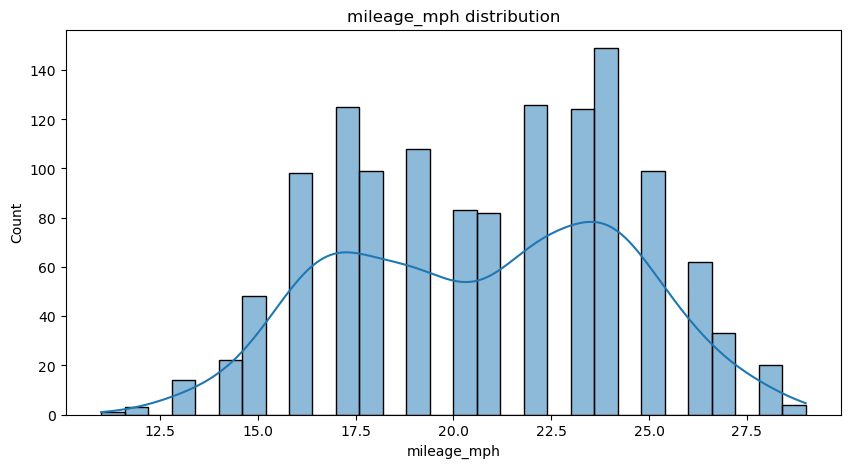

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(truck_df['mileage_mpg'], bins=30, kde=True)
plt.title(f'{"mileage_mph"} distribution')
plt.xlabel(f'{"mileage_mph"}')
plt.show()

In [32]:
low_mileage_trucks = truck_df[truck_df['mileage_mpg']<=15]
low_mileage_trucks.head()

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
5,29303248,9,4000.0,15,gas
7,21093078,8,NaN,14,gas
20,96362807,11,3000.0,14,gas
27,25645401,12,6000.0,14,gas
35,14541120,12,15000.0,14,gas


In [33]:
low_mileage_trucks.shape

(88, 5)

<Axes: xlabel='truck_age', ylabel='mileage_mpg'>

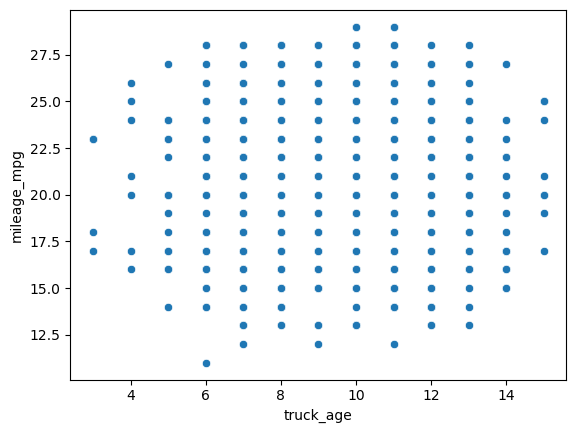

In [34]:
sns.scatterplot(x = "truck_age", y = "mileage_mpg", data=truck_df)

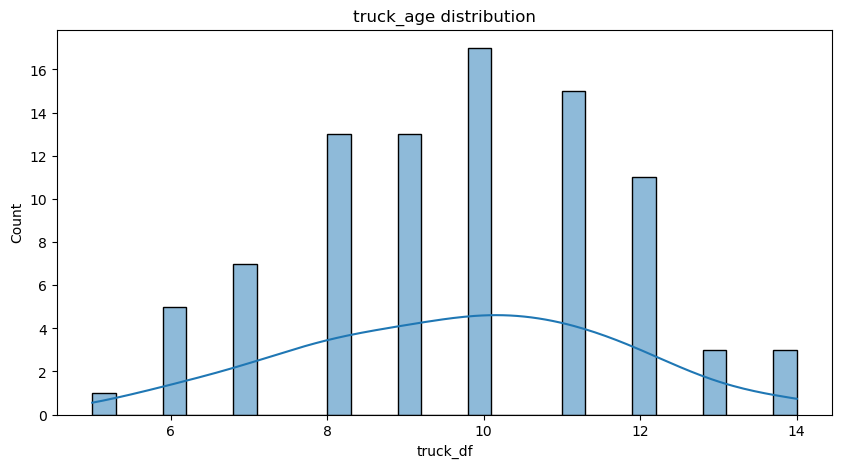

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(low_mileage_trucks['truck_age'], bins=30, kde=True)
plt.title(f'{"truck_age"} distribution')
plt.xlabel(f'{"truck_df"}')
plt.show()

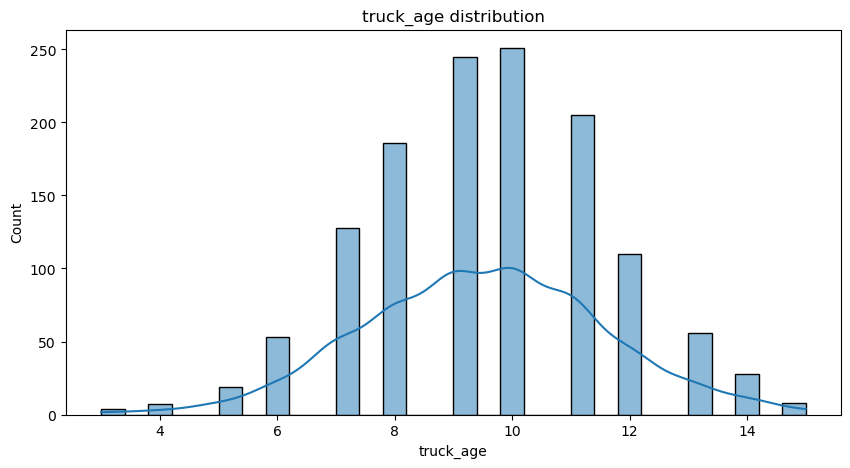

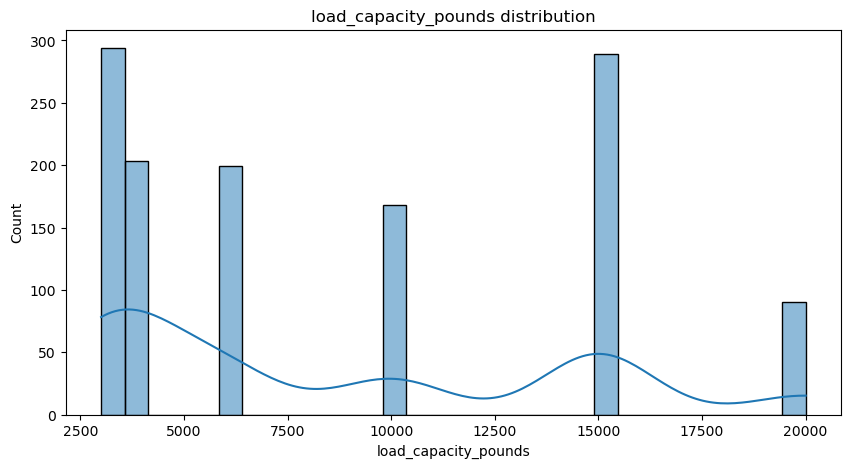

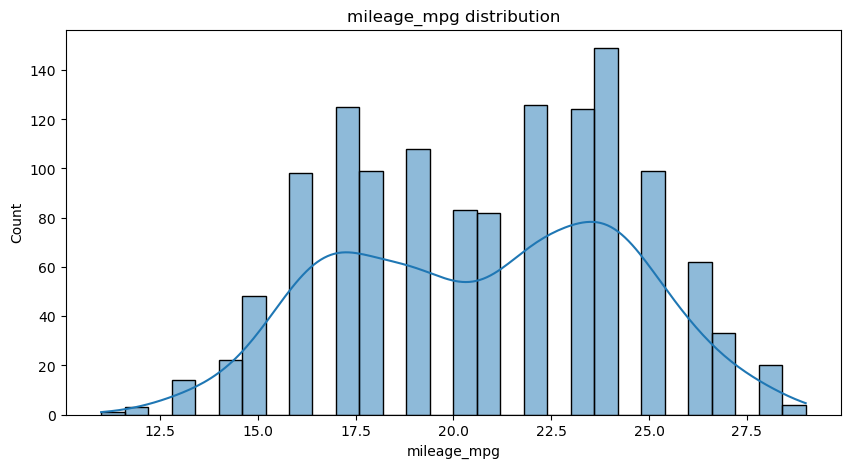

In [36]:
# Numerical cols in truck's dataset
truck_num_cols = ['truck_age', 'load_capacity_pounds', 'mileage_mpg']

# plotting histogram for each column
for col in truck_num_cols:
  plt.figure(figsize=(10, 5))
  sns.histplot(truck_df[col], bins=30, kde=True)
  plt.title(f'{col} distribution')
  plt.xlabel(f'{col}')
  plt.show()

In [37]:
# According to the histogram, setting low mileage to be 15
low_mileage_threshold = 15

# Filter trucks with low mileage
low_mileage_trucks = truck_df[truck_df['mileage_mpg'] <= low_mileage_threshold]

In [38]:
# overview of data of low mileage trucks
low_mileage_trucks.head()

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
5,29303248,9,4000.0,15,gas
7,21093078,8,NaN,14,gas
20,96362807,11,3000.0,14,gas
27,25645401,12,6000.0,14,gas
35,14541120,12,15000.0,14,gas


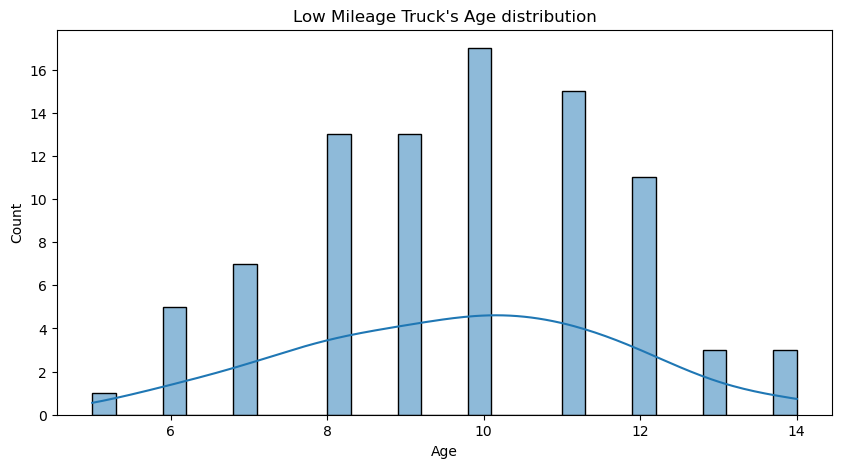

In [39]:
# Age distribution of low mileage trucks
plt.figure(figsize=(10, 5))
sns.histplot(low_mileage_trucks['truck_age'], bins=30, kde=True)
plt.title(f"Low Mileage Truck's Age distribution")
plt.xlabel("Age")
plt.show()

### Traffic Data Analysis

In [41]:
traffic_df.head()

,route_id,date,hour,no_of_vehicles,accident
0,R-ada2a391,2019-01-01,0,669.0,0
1,R-ada2a391,2019-01-01,100,628.0,0
2,R-ada2a391,2019-01-01,200,516.0,0
3,R-ada2a391,2019-01-01,300,582.0,0
4,R-ada2a391,2019-01-01,400,564.0,0


In [42]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597913 entries, 0 to 2597912
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   route_id        object 
 1   date            object 
 2   hour            int64  
 3   no_of_vehicles  float64
 4   accident        int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 99.1+ MB


In [43]:
# Sum of null values
traffic_df.isnull().sum()

route_id             0
date                 0
hour                 0
no_of_vehicles    1152
accident             0
dtype: int64

In [44]:
# statistical description
traffic_df.describe()

,hour,no_of_vehicles,accident
count,2.597913e+06,2.596761e+06,2.597913e+06
mean,1.150021e+03,1.566776e+03,5.320848e-02
std,6.922211e+02,8.959424e+02,2.244490e-01
min,0.000000e+00,1.000000e+02,0.000000e+00
25%,6.000000e+02,6.060000e+02,0.000000e+00
50%,1.200000e+03,1.969000e+03,0.000000e+00
75%,1.800000e+03,2.326000e+03,0.000000e+00
max,2.300000e+03,3.636000e+03,1.000000e+00


In [45]:
# Sum of null values
traffic_df.isnull().sum()

route_id             0
date                 0
hour                 0
no_of_vehicles    1152
accident             0
dtype: int64

In [46]:
# statistical description
traffic_df.describe()

,hour,no_of_vehicles,accident
count,2.597913e+06,2.596761e+06,2.597913e+06
mean,1.150021e+03,1.566776e+03,5.320848e-02
std,6.922211e+02,8.959424e+02,2.244490e-01
min,0.000000e+00,1.000000e+02,0.000000e+00
25%,6.000000e+02,6.060000e+02,0.000000e+00
50%,1.200000e+03,1.969000e+03,0.000000e+00
75%,1.800000e+03,2.326000e+03,0.000000e+00
max,2.300000e+03,3.636000e+03,1.000000e+00


In [47]:
def categorize_time(hour):
    """
    Categorizes hours of the day into time periods.

    Args:
    hour (int): Hour in 24-hour format.

    Returns:
    str: Categorized time period.
    """
    if 300 <= hour < 600:
        return 'Early Morning'
    elif 600 <= hour < 1200:
        return 'Morning'
    elif 1200 <= hour < 1600:
        return 'Noon'
    elif 1600 <= hour < 2000:
        return 'Evening'
    elif 2000 <= hour < 2300:
        return 'Night'
    elif 0 <= hour < 300:
        return 'Night'

# Create a copy of traffic_df
traffic = traffic_df.copy()

# Apply the categorize_time function to create a new column 'time_category'
traffic['time_category'] = traffic['hour'].apply(categorize_time)

# Group by 'time_category' and calculate the mean of 'no_of_vehicles'
mean_vehicles_by_time = traffic.groupby('time_category')['no_of_vehicles'].mean()


In [48]:
traffic.head()

,route_id,date,hour,no_of_vehicles,accident,time_category
0,R-ada2a391,2019-01-01,0,669.0,0,Night
1,R-ada2a391,2019-01-01,100,628.0,0,Night
2,R-ada2a391,2019-01-01,200,516.0,0,Night
3,R-ada2a391,2019-01-01,300,582.0,0,Early Morning
4,R-ada2a391,2019-01-01,400,564.0,0,Early Morning


In [49]:
traffic.groupby('time_category')['no_of_vehicles'].mean()

time_category
Early Morning     563.030071
Evening          1999.185426
Morning          1735.696694
Night            1263.594675
Noon             1990.786218
Name: no_of_vehicles, dtype: float64

In [50]:
traffic.groupby('time_category')['accident'].sum()

time_category
Early Morning    17315
Evening          22863
Morning          34477
Night            34965
Noon             22805
Name: accident, dtype: int64

### Routes weather data analysis

In [94]:
route_weather.head()

,route_id,date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,R-ada2a391,2019-01-01 00:00:00,30.0,11.0,Heavy snow,0.0,90,1.0,1010,0,0,0,0
1,R-ada2a391,2019-01-01 06:00:00,30.0,11.0,Heavy snow,0.0,91,3.0,1012,0,0,0,0
2,R-ada2a391,2019-01-02 00:00:00,28.0,11.0,Cloudy,0.0,91,4.0,1013,0,0,0,0
3,R-ada2a391,2019-01-02 06:00:00,27.0,11.0,Cloudy,0.0,92,6.0,1015,0,0,0,0
4,R-ada2a391,2019-01-03 00:00:00,27.0,9.0,Cloudy,0.0,93,6.0,1016,0,0,0,0


In [96]:
route_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425712 entries, 0 to 425711
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   route_id         425712 non-null  object        
 1   date             425712 non-null  datetime64[ns]
 2   temp             425712 non-null  float64       
 3   wind_speed       425712 non-null  float64       
 4   description      425712 non-null  object        
 5   precip           425712 non-null  float64       
 6   humidity         425712 non-null  int64         
 7   visibility       425712 non-null  float64       
 8   pressure         425712 non-null  int64         
 9   chanceofrain     425712 non-null  int64         
 10  chanceoffog      425712 non-null  int64         
 11  chanceofsnow     425712 non-null  int64         
 12  chanceofthunder  425712 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 42.2+ 

In [98]:
route_weather.describe(include='all')

,route_id,date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
count,425712,425712,425712.000000,425712.000000,425712,425712.000000,425712.000000,425712.000000,425712.000000,425712.0,425712.0,425712.0,425712.0
unique,2352,NaN,NaN,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,R-ada2a391,NaN,NaN,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,181,NaN,NaN,NaN,99356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2019-01-23 12:00:00,57.518090,8.016063,NaN,0.005530,71.654482,5.378733,1015.541540,0.0,0.0,0.0,0.0
min,NaN,2019-01-01 00:00:00,-24.000000,0.000000,NaN,0.000000,3.000000,0.000000,985.000000,0.0,0.0,0.0,0.0
25%,NaN,2019-01-12 06:00:00,43.000000,5.000000,NaN,0.000000,59.000000,6.000000,1011.000000,0.0,0.0,0.0,0.0
50%,NaN,2019-01-23 12:00:00,59.000000,7.000000,NaN,0.000000,76.000000,6.000000,1015.000000,0.0,0.0,0.0,0.0
75%,NaN,2019-02-03 18:00:00,73.000000,11.000000,NaN,0.000000,89.000000,6.000000,1019.000000,0.0,0.0,0.0,0.0
max,NaN,2019-02-15 00:00:00,113.000000,35.000000,NaN,1.300000,100.000000,6.000000,1050.000000,0.0,0.0,0.0,0.0


In [100]:
#unique value of weather
set(route_weather['description'])

{'Blizzard',
 'Blowing snow',
 'Clear',
 'Cloudy',
 'Fog',
 'Freezing drizzle',
 'Freezing fog',
 'Heavy freezing drizzle',
 'Heavy rain',
 'Heavy rain at times',
 'Heavy snow',
 'Ice pellets',
 'Light drizzle',
 'Light freezing rain',
 'Light rain',
 'Light rain shower',
 'Light showers of ice pellets',
 'Light sleet',
 'Light sleet showers',
 'Light snow',
 'Light snow showers',
 'Mist',
 'Moderate or heavy freezing rain',
 'Moderate or heavy rain shower',
 'Moderate or heavy rain with thunder',
 'Moderate or heavy sleet',
 'Moderate or heavy sleet showers',
 'Moderate or heavy snow showers',
 'Moderate or heavy snow with thunder',
 'Moderate rain',
 'Moderate rain at times',
 'Moderate snow',
 'Overcast',
 'Partly cloudy',
 'Patchy freezing drizzle possible',
 'Patchy heavy snow',
 'Patchy light drizzle',
 'Patchy light rain',
 'Patchy light rain with thunder',
 'Patchy light snow',
 'Patchy light snow with thunder',
 'Patchy moderate snow',
 'Patchy rain possible',
 'Patchy sleet p

In [102]:
set(weather_df['description'])

{'Blizzard',
 'Blowing snow',
 'Clear',
 'Cloudy',
 'Fog',
 'Freezing drizzle',
 'Freezing fog',
 'Heavy freezing drizzle',
 'Heavy rain',
 'Heavy rain at times',
 'Heavy snow',
 'Ice pellets',
 'Light drizzle',
 'Light freezing rain',
 'Light rain',
 'Light rain shower',
 'Light showers of ice pellets',
 'Light sleet',
 'Light sleet showers',
 'Light snow',
 'Light snow showers',
 'Mist',
 'Moderate or heavy freezing rain',
 'Moderate or heavy rain shower',
 'Moderate or heavy rain with thunder',
 'Moderate or heavy showers of ice pellets',
 'Moderate or heavy sleet',
 'Moderate or heavy snow showers',
 'Moderate or heavy snow with thunder',
 'Moderate rain',
 'Moderate rain at times',
 'Moderate snow',
 'Overcast',
 'Partly cloudy',
 'Patchy freezing drizzle possible',
 'Patchy heavy snow',
 'Patchy light drizzle',
 'Patchy light rain',
 'Patchy light rain with thunder',
 'Patchy light snow',
 'Patchy moderate snow',
 'Patchy rain possible',
 'Patchy sleet possible',
 'Patchy snow po

### Schedule data analysis

In [105]:
schedule_df.head()

,truck_id,route_id,departure_date,estimated_arrival,delay
0,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:13:12.,0
1,59856374,R-29ea762e,2019-01-01 07:00:00,2019-01-02 04:01:12.,0
2,12602955,R-a3d67783,2019-01-01 07:00:00,2019-01-01 07:45:36.,0
3,46619422,R-31ec9310,2019-01-01 07:00:00,2019-01-01 20:46:48.,0
4,10140178,R-a07c5dbd,2019-01-01 07:00:00,2019-01-01 21:34:11.,0


In [107]:
schedule_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12308 entries, 0 to 12307
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   truck_id           12308 non-null  int64         
 1   route_id           12308 non-null  object        
 2   departure_date     12308 non-null  datetime64[ns]
 3   estimated_arrival  12308 non-null  object        
 4   delay              12308 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 480.9+ KB


In [109]:
schedule_df.describe(include="all")

,truck_id,route_id,departure_date,estimated_arrival,delay
count,1.230800e+04,12308,12308,12308,12308.000000
unique,NaN,2352,NaN,8465,NaN
top,NaN,R-b236e347,NaN,2019-02-03 22:13:12.,NaN
freq,NaN,8,NaN,5,NaN
mean,3.291135e+07,NaN,2019-01-21 17:37:31.023724544,NaN,0.348879
min,1.000839e+07,NaN,2019-01-01 07:00:00,NaN,0.000000
25%,1.844361e+07,NaN,2019-01-10 07:00:00,NaN,0.000000
50%,2.611401e+07,NaN,2019-01-22 07:00:00,NaN,0.000000
75%,3.325027e+07,NaN,2019-02-02 07:00:00,NaN,1.000000
max,9.998167e+07,NaN,2019-02-12 07:00:00,NaN,1.000000


In [115]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
route_weather['date'] = pd.to_datetime(route_weather['date'])
traffic_df['date'] = pd.to_datetime(traffic_df['date'])
schedule_df['departure_date'] = pd.to_datetime(schedule_df['departure_date'])
schedule_df['estimated_arrivale'] = pd.to_datetime(schedule_df['estimated_arrival'])

## **Feature Store**

A feature store is an essential element in machine learning and data science, acting as a centralized platform for storing, managing, and serving features used in model development. Features are the variables or attributes that drive predictions or classifications in machine learning models.

Importance of Feature Store

* Ensures Consistency and Reproducibility
* Facilitates Collaboration and Knowledge Sharing
* Enhances Data Quality and Monitoring
* Saves Time and Costs

In [ ]:
pip install hopsworks

In [118]:
import hopsworks

In [120]:
project = hopsworks.login()

fs = project.get_feature_store()

2024-12-28 17:07:40,485 INFO: Initializing external client
2024-12-28 17:07:40,488 INFO: Base URL: https://c.app.hopsworks.ai:443
2024-12-28 17:07:42,740 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1208501


In [122]:
fs = project.get_feature_store()

### **Driver Data Feature Store**

In [124]:
drivers_df.head()

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,d9f30553-6,Daniel Marks,male,47,5,proactive,7,42302347,62.22
1,82de7bb8-2,Clifford Carr,male,47,14,proactive,4,27867488,60.89
2,7e789842-4,Terry Faulkner MD,male,41,9,conservative,2,13927774,53.67
3,b2555587-8,Brendan Jacobs,male,44,10,proactive,2,69577118,59.82
4,b2e58421-d,Vincent Davis,male,41,10,proactive,7,28650047,62.65


In [126]:
drivers_df['event_time'] = pd.to_datetime('2023-09-15')

In [128]:
drivers_df

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph,event_time
0,d9f30553-6,Daniel Marks,male,47,5,proactive,7,42302347,62.22,2023-09-15
1,82de7bb8-2,Clifford Carr,male,47,14,proactive,4,27867488,60.89,2023-09-15
2,7e789842-4,Terry Faulkner MD,male,41,9,conservative,2,13927774,53.67,2023-09-15
3,b2555587-8,Brendan Jacobs,male,44,10,proactive,2,69577118,59.82,2023-09-15
4,b2e58421-d,Vincent Davis,male,41,10,proactive,7,28650047,62.65,2023-09-15
...,...,...,...,...,...,...,...,...,...,...
1295,57f77e99-8,Robert Johnson,male,60,26,proactive,4,17792974,60.64,2023-09-15
1296,e64c4059-8,Patrick Hernandez,male,46,20,proactive,8,17248432,58.42,2023-09-15
1297,7e6a0cf5-1,Richard Ortiz,male,49,10,conservative,7,21865328,48.29,2023-09-15
1298,c4a966b0-b,Peter Rodriguez,male,49,5,conservative,8,33564827,43.14,2023-09-15


In [130]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   driver_id          1300 non-null   object        
 1   name               1300 non-null   object        
 2   gender             1277 non-null   object        
 3   age                1300 non-null   int64         
 4   experience         1300 non-null   int64         
 5   driving_style      1248 non-null   object        
 6   ratings            1300 non-null   int64         
 7   vehicle_no         1300 non-null   int64         
 8   average_speed_mph  1300 non-null   float64       
 9   event_time         1300 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 101.7+ KB


In [132]:
drivers_df.isna().sum()

driver_id             0
name                  0
gender               23
age                   0
experience            0
driving_style        52
ratings               0
vehicle_no            0
average_speed_mph     0
event_time            0
dtype: int64

In [134]:
drivers_df['driving_style'] = drivers_df['driving_style'].fillna('Unknown')

In [136]:
drivers_df['gender'] = drivers_df['gender'].fillna('Unknown')

In [138]:
drivers_fg = fs.get_or_create_feature_group(
    name = 'drivers_details_fg',
    version = 1,
    description = 'Drivers data',
    primary_key = ['driver_id'],
    event_time = 'event_time',
    online_enabled = False
)

In [140]:
drivers_fg.insert(drivers_df)

Uploading Dataframe: 100.00% |███████████████████████████| Rows 1300/1300 | Elapsed Time: 00:00 | Remaining Time: 00:00


Launching job: drivers_details_fg_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1208501/jobs/named/drivers_details_fg_1_offline_fg_materialization/executions


(Job('drivers_details_fg_1_offline_fg_materialization', 'SPARK'), None)

In [142]:
drivers_df=drivers_df.sort_values(["event_time","driver_id"])

In [144]:
drivers_df.columns

Index(['driver_id', 'name', 'gender', 'age', 'experience', 'driving_style',
       'ratings', 'vehicle_no', 'average_speed_mph', 'event_time'],
      dtype='object')

In [146]:
# List of feature descriptions for drivers
feature_descriptions_drivers = [

    {"name": "driver_id", "description": "unique identification for each driver"},
    {"name": "name", "description": "name of the truck driver"},
    {"name": "gender", "description": "gender of the truck driver"},
    {"name": "age", "description": "age of the truck driver"},
    {"name": "experience", "description": "experience of the truck driver in years"},
    {"name": "driving_style", "description": "driving style of the truck driver, conservative or proactive"},
    {"name": "ratings", "description": "average rating of the truck driver on a scale of 1 to 5"},
    {"name": "vehicle_no", "description": "the number of the driver’s truck"},
    {"name": "average_speed_mph", "description": "average speed of the truck driver in miles per hour"},
    {"name": "event_time", "description": "dummy event time"}

]

# Iterate through the feature descriptions and update them in the feature group
for desc in feature_descriptions_drivers:
    drivers_fg.update_feature_description(desc["name"], desc["description"])


In [148]:
# Configure statistics for the feature group
drivers_fg.statistics_config = {
    "enabled": True,       
    "histograms": True,    
    "correlations": True    
}

drivers_fg.update_statistics_config()

# Compute statistics for the feature group
drivers_fg.compute_statistics()

Statistics Job started successfully, you can follow the progress at 
http://c.app.hopsworks.ai/p/1208501/jobs/named/drivers_details_fg_1_compute_stats_28122024220829/executions
2024-12-28 17:08:39,629 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2024-12-28 17:08:42,701 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2024-12-28 17:09:56,517 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2024-12-28 17:09:56,620 INFO: Waiting for log aggregation to finish.
2024-12-28 17:10:04,878 INFO: Execution finished successfully.


Job('drivers_details_fg_1_compute_stats_28122024220829', 'PYSPARK')

### **Truck Data Feature Store**

In [151]:
# Displaying head of the data
trucks_df.head()

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
0,42302347,10,3000.0,17,gas
1,27867488,14,10000.0,22,diesel
2,13927774,8,10000.0,19,gas
3,69577118,8,20000.0,19,gas
4,28650047,10,4000.0,21,diesel


In [153]:
# Displaying information
trucks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   truck_id              1300 non-null   int64  
 1   truck_age             1300 non-null   int64  
 2   load_capacity_pounds  1243 non-null   float64
 3   mileage_mpg           1300 non-null   int64  
 4   fuel_type             1300 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 50.9+ KB


In [155]:
# Sum of null values
trucks_df.isna().sum()

truck_id                 0
truck_age                0
load_capacity_pounds    57
mileage_mpg              0
fuel_type                0
dtype: int64

In [157]:
trucks_df['fuel_type'].unique()

array(['gas', 'diesel', ''], dtype=object)

In [159]:
# Filling the null values with Unknown
trucks_df['fuel_type']=trucks_df['fuel_type'].replace("",'Unknown')



In [161]:
trucks_df['fuel_type'].value_counts()

fuel_type
diesel     692
gas        568
Unknown     40
Name: count, dtype: int64

In [163]:
trucks_df['event_time'] = pd.to_datetime('2023-08-23')

trucks_df=trucks_df.sort_values(["event_time","truck_id"])

In [165]:
# Create a feature group for truck details
truck_fg = fs.get_or_create_feature_group(
    name="truck_details_fg",          # Name of the feature group
    version=1,                        # Version number
    description="Truck data",         # Description of the feature group
    primary_key=['truck_id'],         # Primary key(s) for the feature group
    event_time='event_time',          # Event time column
    online_enabled=False              # Online feature store capability (set to False)
)


In [167]:
truck_fg.insert(trucks_df)

Uploading Dataframe: 100.00% |███████████████████████████| Rows 1300/1300 | Elapsed Time: 00:00 | Remaining Time: 00:00


Launching job: truck_details_fg_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1208501/jobs/named/truck_details_fg_1_offline_fg_materialization/executions


(Job('truck_details_fg_1_offline_fg_materialization', 'SPARK'), None)

In [169]:
# Add feature descriptions

feature_descriptions_trucks = [
    {"name":'truck_id',"description":"the unique identification number of the truck"},
    {"name":'truck_age',"description":"age of the truck in years"},
    {"name":'load_capacity_pounds',"description":"loading capacity of the truck in years"},
    {"name":'mileage_mpg',"description": "mileage of the truck in miles per gallon"},
    {"name":'fuel_type',"description":"fuel type of the truck"},
    {"name": "event_time", "description": "dummy event time"}

]

for desc in feature_descriptions_trucks:
    truck_fg.update_feature_description(desc["name"], desc["description"])

In [171]:
truck_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

truck_fg.update_statistics_config()
truck_fg.compute_statistics()

Statistics Job started successfully, you can follow the progress at 
http://c.app.hopsworks.ai/p/1208501/jobs/named/truck_details_fg_1_compute_stats_28122024221100/executions
2024-12-28 17:11:10,595 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2024-12-28 17:11:13,665 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2024-12-28 17:12:27,463 INFO: Waiting for execution to finish. Current state: SUCCEEDING. Final status: UNDEFINED
2024-12-28 17:12:30,530 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2024-12-28 17:12:30,593 INFO: Waiting for log aggregation to finish.
2024-12-28 17:12:48,296 INFO: Execution finished successfully.


Job('truck_details_fg_1_compute_stats_28122024221100', 'PYSPARK')

### **Routes Data Feature Store**

In [173]:
routes_df.head()

,route_id,origin_id,destination_id,distance,average_hours
0,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70
1,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96
2,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57
3,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86
4,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22


In [174]:
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   route_id        2352 non-null   object 
 1   origin_id       2352 non-null   object 
 2   destination_id  2352 non-null   object 
 3   distance        2352 non-null   float64
 4   average_hours   2352 non-null   float64
dtypes: float64(2), object(3)
memory usage: 92.0+ KB


In [175]:
routes_df.isna().sum()

route_id          0
origin_id         0
destination_id    0
distance          0
average_hours     0
dtype: int64

In [176]:
routes_df['event_time'] = pd.to_datetime('2023-08-23')

routes_df=routes_df.sort_values(["event_time","route_id"])

In [182]:
# Create feature group for route details
routes_fg = fs.get_or_create_feature_group(
    name="routes_details_fg",         # Name of the feature group
    version=1,                        # Version number
    description="Routes data",        # Description of the feature group
    primary_key=['route_id'],         # Primary key(s) for the feature group
    event_time='event_time',          # Event time column
    online_enabled=False              # Online feature store capability (set to False)
)

In [184]:
routes_fg.insert(routes_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1208501/fs/1196130/fg/1393330


Uploading Dataframe: 100.00% |███████████████████████████| Rows 2352/2352 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: routes_details_fg_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1208501/jobs/named/routes_details_fg_1_offline_fg_materialization/executions


(Job('routes_details_fg_1_offline_fg_materialization', 'SPARK'), None)

In [186]:
# Add feature descriptions

feature_descriptions_routes = [
    {"name": 'route_id', "description": "the unique identifier of the routes"},
    {"name": 'origin_id', "description": "the city identification number for the origin city"},
    {"name": 'destination_id', "description": " the city identification number for the destination"},
    {"name": 'distance', "description": " the distance between the origin and destination cities in miles"},
    {"name": 'average_hours', "description": "average time needed to travel from the origin to the destination in hours"},
    {"name": "event_time", "description": "dummy event time"}

]

for desc in feature_descriptions_routes:
    routes_fg.update_feature_description(desc["name"], desc["description"])

In [243]:
routes_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

routes_fg.update_statistics_config()
#routes_fg.compute_statistics()

### **Truck Schedule Data Feature Store**

In [191]:
schedule_df.head()

,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrivale
0,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:13:12.,0,2019-01-01 13:13:12
1,59856374,R-29ea762e,2019-01-01 07:00:00,2019-01-02 04:01:12.,0,2019-01-02 04:01:12
2,12602955,R-a3d67783,2019-01-01 07:00:00,2019-01-01 07:45:36.,0,2019-01-01 07:45:36
3,46619422,R-31ec9310,2019-01-01 07:00:00,2019-01-01 20:46:48.,0,2019-01-01 20:46:48
4,10140178,R-a07c5dbd,2019-01-01 07:00:00,2019-01-01 21:34:11.,0,2019-01-01 21:34:11


In [193]:
schedule_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12308 entries, 0 to 12307
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   truck_id            12308 non-null  int64         
 1   route_id            12308 non-null  object        
 2   departure_date      12308 non-null  datetime64[ns]
 3   estimated_arrival   12308 non-null  object        
 4   delay               12308 non-null  int64         
 5   estimated_arrivale  12308 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 577.1+ KB


In [195]:
schedule_df.isna().sum()

truck_id              0
route_id              0
departure_date        0
estimated_arrival     0
delay                 0
estimated_arrivale    0
dtype: int64

In [197]:
schedule_df = schedule_df.sort_values(['estimated_arrival',"truck_id"])

In [203]:
# Create  feature group for truck schedule details
schedule_fg = fs.get_or_create_feature_group(
    name="truck_schedule_details_fg",  # Name of the feature group
    version=1,                          # Version number
    description="Truck Schedule data",  # Description of the feature group
    primary_key=['truck_id','route_id'], # Primary key(s) for the feature group
    event_time='estimated_arrival',     # Event time column
    online_enabled=True                  # Online feature store capability (set to True)
)


### **Traffic Feature Store**

In [208]:
traffic_df.head()

,route_id,date,hour,no_of_vehicles,accident
0,R-ada2a391,2019-01-01,0,669.0,0
1,R-ada2a391,2019-01-01,100,628.0,0
2,R-ada2a391,2019-01-01,200,516.0,0
3,R-ada2a391,2019-01-01,300,582.0,0
4,R-ada2a391,2019-01-01,400,564.0,0


In [210]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597913 entries, 0 to 2597912
Data columns (total 5 columns):
 #   Column          Dtype         
---  ------          -----         
 0   route_id        object        
 1   date            datetime64[ns]
 2   hour            int64         
 3   no_of_vehicles  float64       
 4   accident        int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 99.1+ MB


In [212]:
traffic_df.isna().sum()

route_id             0
date                 0
hour                 0
no_of_vehicles    1152
accident             0
dtype: int64

In [214]:
traffic_df = traffic_df.sort_values(['date','route_id','hour'])

In [216]:
traffic_fg = fs.get_or_create_feature_group(
    name="traffic_details_fg",
    version=1,
    description="Traffic data",
    primary_key=['route_id','hour'],
    event_time='date',
    online_enabled=True
)

In [218]:
traffic_fg.insert(traffic_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1208501/fs/1196130/fg/1393331


Uploading Dataframe: 100.00% |█████████████████████| Rows 2597913/2597913 | Elapsed Time: 04:39 | Remaining Time: 00:00


Launching job: traffic_details_fg_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1208501/jobs/named/traffic_details_fg_1_offline_fg_materialization/executions


(Job('traffic_details_fg_1_offline_fg_materialization', 'SPARK'), None)

In [219]:
feature_descriptions_traffic = [
     {"name": 'route_id', "description": "the identification number of the route"},
     {"name": 'date', "description": " date of the traffic observation"},
     {"name": 'hour', "description": "the hour of the observation as a number in 24-hour format"},
     {"name": 'no_of_vehicles', "description": "the number of vehicles observed on the route"},
     {"name": 'accident', "description": "binary variable to denote if an accident was observed"}

]

for desc in feature_descriptions_traffic:
    traffic_fg.update_feature_description(desc["name"], desc["description"])

In [241]:
traffic_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

traffic_fg.update_statistics_config()
#traffic_fg.compute_statistics()

### **City Weather feature store**

In [223]:
weather_df.head()

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,C-927ceb5e,2019-01-01,0,30.0,11.0,Light snow,0.0,86,6.0,1019.0,0.0,0.0,0.0,0.0
1,C-927ceb5e,2019-01-01,100,28.0,12.0,Light snow,0.0,86,5.0,1021.0,0.0,0.0,0.0,0.0
2,C-927ceb5e,2019-01-01,200,28.0,13.0,Moderate snow,0.0,85,4.0,1022.0,0.0,0.0,0.0,0.0
3,C-927ceb5e,2019-01-01,300,28.0,14.0,Moderate snow,0.0,84,3.0,1024.0,0.0,0.0,0.0,0.0
4,C-927ceb5e,2019-01-01,400,28.0,13.0,Moderate snow,0.0,84,3.0,1025.0,0.0,0.0,0.0,0.0


In [225]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55176 entries, 0 to 55175
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   city_id          55176 non-null  object        
 1   date             55176 non-null  datetime64[ns]
 2   hour             55176 non-null  int64         
 3   temp             55176 non-null  float64       
 4   wind_speed       55176 non-null  float64       
 5   description      55176 non-null  object        
 6   precip           55176 non-null  float64       
 7   humidity         55176 non-null  int64         
 8   visibility       55176 non-null  float64       
 9   pressure         55176 non-null  float64       
 10  chanceofrain     55176 non-null  float64       
 11  chanceoffog      55176 non-null  float64       
 12  chanceofsnow     55176 non-null  float64       
 13  chanceofthunder  55176 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int6

In [227]:
weather_df.isna().sum()

city_id            0
date               0
hour               0
temp               0
wind_speed         0
description        0
precip             0
humidity           0
visibility         0
pressure           0
chanceofrain       0
chanceoffog        0
chanceofsnow       0
chanceofthunder    0
dtype: int64

In [229]:
weather_df=weather_df.sort_values(['date','city_id','hour'])

In [231]:
city_weather_fg = fs.get_or_create_feature_group(
    name="city_weather_details_fg",
    version=1,
    description="City Weather data",
    primary_key=['city_id','hour'],
    event_time='date',
    online_enabled=True
)

In [233]:
city_weather_fg.insert(weather_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1208501/fs/1196130/fg/1393332


Uploading Dataframe: 100.00% |█████████████████████████| Rows 55176/55176 | Elapsed Time: 00:10 | Remaining Time: 00:00


Launching job: city_weather_details_fg_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1208501/jobs/named/city_weather_details_fg_1_offline_fg_materialization/executions


(Job('city_weather_details_fg_1_offline_fg_materialization', 'SPARK'), None)

In [234]:
feature_descriptions_weather = [
    {"name": 'city_id', "description":  'the unique identifier of the city'},
    {"name": 'date', "description":  'date of the observation'},
    {"name": 'hour', "description": 'the hour of the observation as a number in 24hour format'},
    {"name": 'temp', "description":  'temperature in Fahrenheit'},
    {"name": 'wind_speed', "description":  'wind speed in miles per hour'},
    {"name": 'description', "description":  'description of the weather conditions such as Clear, Cloudy, etc'},
    {"name": 'precip', "description":  'precipitation in inches'},
    {"name": 'humidity', "description":  'humidity observed'},
    {"name": 'visibility', "description":  'visibility observed in miles per hour'},
    {"name": 'pressure', "description":  'pressure observed in millibar'},
    {"name": 'chanceofrain', "description":  'chances of rain'},
    {"name": 'chanceoffog', "description":  'chances of fog'},
    {"name": 'chanceofsnow', "description":  'chances of snow'},
    {"name": 'chanceofthunder', "description":  'chances of thunder'}

]

for desc in feature_descriptions_weather:
    city_weather_fg.update_feature_description(desc["name"], desc["description"])

In [239]:
city_weather_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

city_weather_fg.update_statistics_config()
#city_weather_fg.compute_statistics()

### **Route Weather Feather Store**

In [246]:
route_weather.head()

,route_id,date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,R-ada2a391,2019-01-01 00:00:00,30.0,11.0,Heavy snow,0.0,90,1.0,1010,0,0,0,0
1,R-ada2a391,2019-01-01 06:00:00,30.0,11.0,Heavy snow,0.0,91,3.0,1012,0,0,0,0
2,R-ada2a391,2019-01-02 00:00:00,28.0,11.0,Cloudy,0.0,91,4.0,1013,0,0,0,0
3,R-ada2a391,2019-01-02 06:00:00,27.0,11.0,Cloudy,0.0,92,6.0,1015,0,0,0,0
4,R-ada2a391,2019-01-03 00:00:00,27.0,9.0,Cloudy,0.0,93,6.0,1016,0,0,0,0


In [248]:
route_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425712 entries, 0 to 425711
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   route_id         425712 non-null  object        
 1   date             425712 non-null  datetime64[ns]
 2   temp             425712 non-null  float64       
 3   wind_speed       425712 non-null  float64       
 4   description      425712 non-null  object        
 5   precip           425712 non-null  float64       
 6   humidity         425712 non-null  int64         
 7   visibility       425712 non-null  float64       
 8   pressure         425712 non-null  int64         
 9   chanceofrain     425712 non-null  int64         
 10  chanceoffog      425712 non-null  int64         
 11  chanceofsnow     425712 non-null  int64         
 12  chanceofthunder  425712 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 42.2+ 

In [250]:
route_weather.isna().sum()

route_id           0
date               0
temp               0
wind_speed         0
description        0
precip             0
humidity           0
visibility         0
pressure           0
chanceofrain       0
chanceoffog        0
chanceofsnow       0
chanceofthunder    0
dtype: int64

In [252]:
route_weather = route_weather.sort_values(by = ['date','route_id'])

In [254]:
route_weather_fg = fs.get_or_create_feature_group(
    name="route_weather_details_fg",
    version=1,
    description="Route Weather data",
    primary_key=['route_id'],
    event_time='date',
    online_enabled=True
)

In [256]:
route_weather_fg.insert(route_weather)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1208501/fs/1196130/fg/1393333


Uploading Dataframe: 100.00% |███████████████████████| Rows 425712/425712 | Elapsed Time: 01:14 | Remaining Time: 00:00


Launching job: route_weather_details_fg_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1208501/jobs/named/route_weather_details_fg_1_offline_fg_materialization/executions


(Job('route_weather_details_fg_1_offline_fg_materialization', 'SPARK'), None)

In [257]:
feature_descriptions_route_weather = [

    {"name": 'route_id', "description":  'the unique identifier of the city'},
    {"name": 'date', "description":  'date of the observation'},
    {"name": 'temp', "description":  'temperature in Fahrenheit'},
    {"name": 'wind_speed', "description":  'wind speed in miles per hour'},
    {"name": 'description', "description":  'description of the weather conditions such as Clear, Cloudy, etc'},
    {"name": 'precip', "description":  'precipitation in inches'},
    {"name": 'humidity', "description":  'humidity observed'},
    {"name": 'visibility', "description":  'visibility observed in miles per hour'},
    {"name": 'pressure', "description":  'pressure observed in millibar'},
    {"name": 'chanceofrain', "description":  'chances of rain'},
    {"name": 'chanceoffog', "description":  'chances of fog'},
    {"name": 'chanceofsnow', "description":  'chances of snow'},
    {"name": 'chanceofthunder', "description":  'chances of thunder'}

]

for desc in feature_descriptions_route_weather:
    route_weather_fg.update_feature_description(desc["name"], desc["description"])

In [260]:
route_weather_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

route_weather_fg.update_statistics_config()
#route_weather_fg.compute_statistics()

### **Fetch data from feature store**

In [263]:
routes_df_fg = fs.get_feature_group('routes_details_fg', version=1)
query = routes_df_fg.select_all()
routes_df=query.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.67s) 


In [265]:
route_weather_fg = fs.get_feature_group('route_weather_details_fg', version=1)
query = route_weather_fg.select_all()
route_weather=query.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (4.25s) 


In [267]:
drivers_df_fg = fs.get_feature_group('drivers_details_fg', version=1)
query = drivers_df_fg.select_all()
drivers_df=query.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.69s) 


In [269]:
trucks_df_fg = fs.get_feature_group('truck_details_fg', version=1)
query = trucks_df_fg.select_all()
trucks_df=query.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.40s) 


In [271]:
traffic_df_fg = fs.get_feature_group('traffic_details_fg', version=1)
query = traffic_df_fg.select_all()
traffic_df=query.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (13.47s) 


In [548]:
#schedule_df_fg = fs.get_feature_group('truck_schedule_details_fg', version=1)
#query = schedule_df_fg.select_all()
#schedule_df=query.read()

In [275]:
weather_df_fg = fs.get_feature_group('city_weather_details_fg', version=1)
query = weather_df_fg.select_all()
weather_df=query.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.02s) 


## **Data Preprocessing**

### **Missing Value Detection and Imputation**

In [279]:
drivers_df.head()

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph,event_time
0,7538576d-2,Nathan Gonzales,male,44,7,conservative,4,14698380,39.18,2023-09-15 00:00:00+00:00
1,b722825b-3,Matthew Allison,male,59,18,conservative,6,99047862,44.91,2023-09-15 00:00:00+00:00
2,b9d4bfb4-d,Marc West,male,51,24,proactive,8,33976838,57.80,2023-09-15 00:00:00+00:00
3,4e98ea31-5,Albert Barron,male,43,1,proactive,2,31057961,61.26,2023-09-15 00:00:00+00:00
4,9cb46965-d,Michael Smith,male,44,17,proactive,4,22705355,64.42,2023-09-15 00:00:00+00:00


In [281]:
drivers_df = drivers_df.drop(columns=['event_time'])

In [285]:
drivers_df[drivers_df.duplicated(subset=['driver_id'])]

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph


In [287]:
trucks_df.head()

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type,event_time
0,27199418,10,6000.0,13,gas,2023-08-23 00:00:00+00:00
1,27831338,7,6000.0,25,diesel,2023-08-23 00:00:00+00:00
2,11316377,9,15000.0,19,gas,2023-08-23 00:00:00+00:00
3,82081587,11,15000.0,24,diesel,2023-08-23 00:00:00+00:00
4,30154214,9,20000.0,19,gas,2023-08-23 00:00:00+00:00


In [289]:
trucks_df=trucks_df.drop(columns = ['event_time'])

In [291]:
trucks_df.isna().sum()

truck_id                 0
truck_age                0
load_capacity_pounds    57
mileage_mpg              0
fuel_type                0
dtype: int64

In [293]:
trucks_df['load_capacity_pounds'].unique()

array([ 6000., 15000., 20000.,  4000.,  3000.,    nan, 10000.])

In [295]:
trucks_df['load_capacity_pounds'].mode()

0    3000.0
Name: load_capacity_pounds, dtype: float64

In [301]:
trucks_df[trucks_df.duplicated(subset=['truck_id'])]

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type


In [303]:
routes_df.head()

,route_id,origin_id,destination_id,distance,average_hours,event_time
0,R-914ed969,C-d80a1e7d,C-2c9e75ef,689.34,13.79,2023-08-23 00:00:00+00:00
1,R-ddcc6375,C-639c5e36,C-4fe0fa24,6393.13,127.86,2023-08-23 00:00:00+00:00
2,R-48c8a68b,C-419cd14c,C-7212cebe,1019.41,20.39,2023-08-23 00:00:00+00:00
3,R-92e4c6e3,C-d9e9d934,C-9bbf5d8a,197.59,3.95,2023-08-23 00:00:00+00:00
4,R-b2334f87,C-419cd14c,C-927ceb5e,860.10,17.20,2023-08-23 00:00:00+00:00


In [305]:
routes_df = routes_df.drop(columns = ['event_time'])

In [307]:
routes_df.isna().sum()

route_id          0
origin_id         0
destination_id    0
distance          0
average_hours     0
dtype: int64

In [309]:
routes_df[routes_df.duplicated(subset = ['route_id'])]

,route_id,origin_id,destination_id,distance,average_hours


In [311]:
schedule_df.head()

,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrivale
460,12823463,R-1b7d2dcc,2019-01-01 07:00:00,2019-01-01 07:04:48.,0,2019-01-01 07:04:48
559,21928760,R-3bc91a35,2019-01-01 07:00:00,2019-01-01 07:04:48.,0,2019-01-01 07:04:48
542,79515526,R-564643b5,2019-01-01 07:00:00,2019-01-01 07:25:48.,0,2019-01-01 07:25:48
407,83958550,R-d73c56ee,2019-01-01 07:00:00,2019-01-01 07:27:36.,0,2019-01-01 07:27:36
453,33867840,R-36ae60d9,2019-01-01 07:00:00,2019-01-01 07:40:48.,0,2019-01-01 07:40:48


In [313]:
schedule_df.isna().sum()

truck_id              0
route_id              0
departure_date        0
estimated_arrival     0
delay                 0
estimated_arrivale    0
dtype: int64

In [315]:
schedule_df[schedule_df.duplicated()]

,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrivale


In [317]:
weather_df.head()

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,C-c4565ee8,2019-01-02 00:00:00+00:00,700,32.0,4.0,Partly cloudy,0.0,87,4.0,1024.0,0.0,0.0,0.0,0.0
1,C-90e30162,2019-01-01 00:00:00+00:00,2000,50.0,7.0,Clear,0.0,87,6.0,1023.0,0.0,0.0,0.0,0.0
2,C-2c9e75ef,2019-01-28 00:00:00+00:00,900,45.0,12.0,Overcast,0.0,69,6.0,1015.0,0.0,0.0,0.0,0.0
3,C-ff8c0c3c,2019-01-08 00:00:00+00:00,1400,50.0,9.0,Sunny,0.0,42,6.0,1026.0,0.0,0.0,0.0,0.0
4,C-451776b7,2019-01-06 00:00:00+00:00,100,52.0,6.0,Light rain,0.0,87,4.0,1014.0,0.0,0.0,0.0,0.0


In [319]:
weather_df[weather_df.duplicated(subset=['city_id','date','hour'])]

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder


In [321]:
weather_df=weather_df.drop_duplicates(subset=['city_id','date','hour'])

In [323]:
weather_df=weather_df.drop(columns=['chanceofrain','chanceoffog','chanceofsnow','chanceofthunder'])

In [342]:
weather_date_val = pd.to_datetime(weather_df['date'].astype(str) + ' ' + weather_df['hour'].astype(str))
weather_df.insert(1, 'custom_date', weather_date_val)

In [346]:
weather_df.head()

,city_id,custom_date,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure
0,C-c4565ee8,2019-01-02 07:00:00+00:00,2019-01-02 00:00:00+00:00,07:00:00,32.0,4.0,Partly cloudy,0.0,87,4.0,1024.0
1,C-90e30162,2019-01-01 20:00:00+00:00,2019-01-01 00:00:00+00:00,20:00:00,50.0,7.0,Clear,0.0,87,6.0,1023.0
2,C-2c9e75ef,2019-01-28 09:00:00+00:00,2019-01-28 00:00:00+00:00,09:00:00,45.0,12.0,Overcast,0.0,69,6.0,1015.0
3,C-ff8c0c3c,2019-01-08 14:00:00+00:00,2019-01-08 00:00:00+00:00,14:00:00,50.0,9.0,Sunny,0.0,42,6.0,1026.0
4,C-451776b7,2019-01-06 01:00:00+00:00,2019-01-06 00:00:00+00:00,01:00:00,52.0,6.0,Light rain,0.0,87,4.0,1014.0


In [348]:
weather_df.describe()

,temp,wind_speed,precip,humidity,visibility,pressure
count,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000
mean,36.216951,7.903499,0.003482,70.921752,5.158141,1019.522156
std,21.424286,4.361133,0.022319,21.089406,1.650451,8.578367
min,-35.000000,0.000000,0.000000,3.000000,0.000000,988.000000
25%,23.000000,5.000000,0.000000,58.000000,6.000000,1014.000000
50%,34.000000,7.000000,0.000000,75.000000,6.000000,1019.000000
75%,48.000000,11.000000,0.000000,89.000000,6.000000,1025.000000
max,104.000000,33.000000,0.600000,100.000000,6.000000,1049.000000


In [350]:
route_weather.head(2)

,route_id,date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,R-37d04d1e,2019-02-01 18:00:00+00:00,86.0,15.0,Thundery outbreaks possible,0.0,43,6.0,1008,0,0,0,0
1,R-25623093,2019-01-11 06:00:00+00:00,45.0,6.0,Light rain,0.0,96,6.0,1015,0,0,0,0


In [352]:
route_weather.describe()

,temp,wind_speed,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
count,425712.000000,425712.000000,425712.000000,425712.000000,425712.000000,425712.000000,425712.0,425712.0,425712.0,425712.0
mean,57.518090,8.016063,0.005530,71.654482,5.378733,1015.541540,0.0,0.0,0.0,0.0
std,19.919266,4.469639,0.028918,21.106049,1.414776,7.306384,0.0,0.0,0.0,0.0
min,-24.000000,0.000000,0.000000,3.000000,0.000000,985.000000,0.0,0.0,0.0,0.0
25%,43.000000,5.000000,0.000000,59.000000,6.000000,1011.000000,0.0,0.0,0.0,0.0
50%,59.000000,7.000000,0.000000,76.000000,6.000000,1015.000000,0.0,0.0,0.0,0.0
75%,73.000000,11.000000,0.000000,89.000000,6.000000,1019.000000,0.0,0.0,0.0,0.0
max,113.000000,35.000000,1.300000,100.000000,6.000000,1050.000000,0.0,0.0,0.0,0.0


In [354]:
route_weather[route_weather.duplicated(subset=['route_id','date'])]

,route_id,date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder


In [356]:
# Drop unnecessary cols
route_weather=route_weather.drop(columns=['chanceofrain','chanceoffog','chanceofsnow','chanceofthunder'])

In [358]:
route_weather.isna().sum()

route_id       0
date           0
temp           0
wind_speed     0
description    0
precip         0
humidity       0
visibility     0
pressure       0
dtype: int64

In [360]:
traffic_df.head(2)

,route_id,date,hour,no_of_vehicles,accident
0,R-a4b1265c,2019-01-14 00:00:00+00:00,0,595.0,0
1,R-219cc33b,2019-02-13 00:00:00+00:00,1900,2011.0,0


In [362]:
traffic_df[traffic_df.duplicated(subset=['route_id','date','hour'])]

,route_id,date,hour,no_of_vehicles,accident


In [364]:
traffic_df=traffic_df.drop_duplicates(subset=['route_id','date','hour'],keep='first')

In [366]:
traffic_df.isna().sum()

route_id             0
date                 0
hour                 0
no_of_vehicles    1152
accident             0
dtype: int64

In [368]:
# Convert 'hour' to a 4-digit string format
traffic_df['hour'] = traffic_df['hour'].apply(lambda x: f'{x:04d}')

# Convert 'hour' to datetime format
traffic_df['hour'] = pd.to_datetime(traffic_df['hour'], format='%H%M').dt.time

# Combine 'date' and 'hour' to create a new datetime column 'custom_date' and insert it at index 1
traffic_custom_date = pd.to_datetime(traffic_df['date'].astype(str) + ' ' + traffic_df['hour'].astype(str))
traffic_df.insert(1, 'custom_date', traffic_custom_date)

In [369]:
traffic_df.head(5)

,route_id,custom_date,date,hour,no_of_vehicles,accident
0,R-a4b1265c,2019-01-14 00:00:00+00:00,2019-01-14 00:00:00+00:00,00:00:00,595.0,0
1,R-219cc33b,2019-02-13 19:00:00+00:00,2019-02-13 00:00:00+00:00,19:00:00,2011.0,0
2,R-1c86de64,2019-01-19 18:00:00+00:00,2019-01-19 00:00:00+00:00,18:00:00,2389.0,0
3,R-1d52e77e,2019-01-08 03:00:00+00:00,2019-01-08 00:00:00+00:00,03:00:00,594.0,0
4,R-ebd8d425,2019-01-22 01:00:00+00:00,2019-01-22 00:00:00+00:00,01:00:00,478.0,0


In [370]:
schedule_df.head(2)

,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrivale
460,12823463,R-1b7d2dcc,2019-01-01 07:00:00,2019-01-01 07:04:48.,0,2019-01-01 07:04:48
559,21928760,R-3bc91a35,2019-01-01 07:00:00,2019-01-01 07:04:48.,0,2019-01-01 07:04:48


In [371]:
schedule_df.isna().sum()

truck_id              0
route_id              0
departure_date        0
estimated_arrival     0
delay                 0
estimated_arrivale    0
dtype: int64

In [372]:
schedule_df.describe(include='all')

,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrivale
count,1.230800e+04,12308,12308,12308,12308.000000,12308
unique,NaN,2352,NaN,8465,NaN,NaN
top,NaN,R-1b7d2dcc,NaN,2019-02-03 22:13:12.,NaN,NaN
freq,NaN,8,NaN,5,NaN,NaN
mean,3.291135e+07,NaN,2019-01-21 17:37:31.023724544,NaN,0.348879,2019-01-22 18:25:07.042654976
min,1.000839e+07,NaN,2019-01-01 07:00:00,NaN,0.000000,2019-01-01 07:04:48
25%,1.844361e+07,NaN,2019-01-10 07:00:00,NaN,0.000000,2019-01-11 00:08:06
50%,2.611401e+07,NaN,2019-01-22 07:00:00,NaN,0.000000,2019-01-22 15:58:12
75%,3.325027e+07,NaN,2019-02-02 07:00:00,NaN,1.000000,2019-02-03 13:51:18
max,9.998167e+07,NaN,2019-02-12 07:00:00,NaN,1.000000,2019-02-14 16:06:00


In [373]:
schedule_df[schedule_df.duplicated(subset=['truck_id','route_id','departure_date'])]

,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrivale


## Feature Engineering

Merge Route Weather with Schedule Data

In [381]:
schedule_df.insert(0,'unique_id',np.arange(len(schedule_df)))

In [383]:
nearest_6h_schedule_df = schedule_df.copy()

In [387]:
# Ensure the columns are in datetime format
nearest_6h_schedule_df['estimated_arrival'] = pd.to_datetime(nearest_6h_schedule_df['estimated_arrival'])
nearest_6h_schedule_df['departure_date'] = pd.to_datetime(nearest_6h_schedule_df['departure_date'])

# Apply rounding to the nearest 6 hours
nearest_6h_schedule_df['estimated_arrival'] = nearest_6h_schedule_df['estimated_arrival'].dt.ceil("6H")
nearest_6h_schedule_df['departure_date'] = nearest_6h_schedule_df['departure_date'].dt.floor("6H")

In [389]:
nearest_6h_schedule_df.head()

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrivale
460,0,12823463,R-1b7d2dcc,2019-01-01 06:00:00,2019-01-01 12:00:00,0,2019-01-01 07:04:48
559,1,21928760,R-3bc91a35,2019-01-01 06:00:00,2019-01-01 12:00:00,0,2019-01-01 07:04:48
542,2,79515526,R-564643b5,2019-01-01 06:00:00,2019-01-01 12:00:00,0,2019-01-01 07:25:48
407,3,83958550,R-d73c56ee,2019-01-01 06:00:00,2019-01-01 12:00:00,0,2019-01-01 07:27:36
453,4,33867840,R-36ae60d9,2019-01-01 06:00:00,2019-01-01 12:00:00,0,2019-01-01 07:40:48


In [391]:
# Assign a new column 'date' using a list comprehension to generate date ranges between 'departure_date' and 'estimated_arrival' with a frequency of 6 hours
# This will create a list of date ranges for each row
# Explode the 'date' column to create separate rows for each date range

exploded_6h_scheduled_df=(nearest_6h_schedule_df.assign(date = [pd.date_range(start, end, freq='6H')
                      for start, end
                      in zip(nearest_6h_schedule_df['departure_date'], nearest_6h_schedule_df['estimated_arrival'])]).explode('date', ignore_index = True))

In [393]:
exploded_6h_scheduled_df.head(2)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrivale,date
0,0,12823463,R-1b7d2dcc,2019-01-01 06:00:00,2019-01-01 12:00:00,0,2019-01-01 07:04:48,2019-01-01 06:00:00
1,0,12823463,R-1b7d2dcc,2019-01-01 06:00:00,2019-01-01 12:00:00,0,2019-01-01 07:04:48,2019-01-01 12:00:00


In [401]:
# Ensure both 'date' columns are in the same format
exploded_6h_scheduled_df['date'] = pd.to_datetime(exploded_6h_scheduled_df['date']).dt.tz_localize(None)
route_weather['date'] = pd.to_datetime(route_weather['date']).dt.tz_localize(None)

# Perform the merge
schduled_weather = exploded_6h_scheduled_df.merge(route_weather, on=['route_id', 'date'], how='left')

In [405]:
schduled_weather.head()

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrivale,date,temp,wind_speed,description,precip,humidity,visibility,pressure
0,0,12823463,R-1b7d2dcc,2019-01-01 06:00:00,2019-01-01 12:00:00,0,2019-01-01 07:04:48,2019-01-01 06:00:00,61.0,5.0,Clear,0.0,89,6.0,1016
1,0,12823463,R-1b7d2dcc,2019-01-01 06:00:00,2019-01-01 12:00:00,0,2019-01-01 07:04:48,2019-01-01 12:00:00,54.0,12.0,Sunny,0.0,59,6.0,1024
2,1,21928760,R-3bc91a35,2019-01-01 06:00:00,2019-01-01 12:00:00,0,2019-01-01 07:04:48,2019-01-01 06:00:00,55.0,12.0,Sunny,0.0,52,6.0,1025
3,1,21928760,R-3bc91a35,2019-01-01 06:00:00,2019-01-01 12:00:00,0,2019-01-01 07:04:48,2019-01-01 12:00:00,61.0,4.0,Clear,0.0,92,6.0,1017
4,2,79515526,R-564643b5,2019-01-01 06:00:00,2019-01-01 12:00:00,0,2019-01-01 07:25:48,2019-01-01 06:00:00,86.0,4.0,Light rain shower,0.0,75,6.0,1012


In [407]:
# Define a custom function to calculate mode
def custom_mode(x):
    return x.mode().iloc[0]

# Group by specified columns and aggregate
schedule_weather_grp = schduled_weather.groupby(['unique_id','truck_id','route_id'], as_index=False).agg(
    route_avg_temp=('temp','mean'),
    route_avg_wind_speed=('wind_speed','mean'),
    route_avg_precip=('precip','mean'),
    route_avg_humidity=('humidity','mean'),
    route_avg_visibility=('visibility','mean'),
    route_avg_pressure=('pressure','mean'),
    route_description=('description', custom_mode)
)


In [409]:
schedule_weather_grp

,unique_id,truck_id,route_id,route_avg_temp,route_avg_wind_speed,route_avg_precip,route_avg_humidity,route_avg_visibility,route_avg_pressure,route_description
0,0,12823463,R-1b7d2dcc,57.500000,8.500000,0.000000,74.000000,6.000000,1020.000000,Clear
1,1,21928760,R-3bc91a35,58.000000,8.000000,0.000000,72.000000,6.000000,1021.000000,Clear
2,2,79515526,R-564643b5,81.500000,11.000000,0.000000,82.500000,6.000000,1009.000000,Light rain shower
3,3,83958550,R-d73c56ee,75.500000,13.000000,0.000000,53.500000,6.000000,1015.500000,Partly cloudy
4,4,33867840,R-36ae60d9,35.000000,11.500000,0.000000,76.000000,5.000000,1009.500000,Clear
...,...,...,...,...,...,...,...,...,...,...
12303,12303,25666034,R-6a8b7512,53.771429,5.857143,0.000000,74.600000,4.971429,1024.942857,Light freezing rain
12304,12304,25940992,R-bc105cc5,59.657143,7.742857,0.000000,52.028571,6.000000,1013.371429,Clear
12305,12305,19268982,R-bd5683cd,70.000000,7.600000,0.008571,73.742857,4.657143,1011.971429,Mist
12306,12306,90639626,R-fa6a340a,63.885714,8.200000,0.008571,81.800000,4.257143,1014.114286,Patchy rain possible


In [411]:
schedule_weather_merge=schedule_df.merge(schedule_weather_grp,on=['unique_id','truck_id','route_id'],how='left')

In [413]:
schedule_weather_merge.shape

(12308, 14)

In [419]:
schedule_weather_merge = schedule_weather_merge.drop(columns='estimated_arrivale')

In [421]:
schedule_weather_merge.isna().sum()

unique_id               0
truck_id                0
route_id                0
departure_date          0
estimated_arrival       0
delay                   0
route_avg_temp          0
route_avg_wind_speed    0
route_avg_precip        0
route_avg_humidity      0
route_avg_visibility    0
route_avg_pressure      0
route_description       0
dtype: int64

In [427]:
#take hourly as weather data available hourly
nearest_hour_schedule_df=schedule_df.copy()

In [431]:
# Convert to datetime format if not already
nearest_hour_schedule_df['estimated_arrival'] = pd.to_datetime(nearest_hour_schedule_df['estimated_arrival'])
nearest_hour_schedule_df['departure_date'] = pd.to_datetime(nearest_hour_schedule_df['departure_date'])

# Round to the nearest hour
nearest_hour_schedule_df['estimated_arrival_nearest_hour'] = nearest_hour_schedule_df['estimated_arrival'].dt.round("H")
nearest_hour_schedule_df['departure_date_nearest_hour'] = nearest_hour_schedule_df['departure_date'].dt.round("H")


In [433]:
nearest_hour_schedule_route_df=pd.merge(nearest_hour_schedule_df, routes_df, on='route_id', how='left')

In [435]:
nearest_hour_schedule_route_df.shape

(12308, 13)

In [437]:
nearest_hour_schedule_route_df.dtypes

unique_id                                  int32
truck_id                                   int64
route_id                                  object
departure_date                    datetime64[ns]
estimated_arrival                 datetime64[ns]
delay                                      int64
estimated_arrivale                datetime64[ns]
estimated_arrival_nearest_hour    datetime64[ns]
departure_date_nearest_hour       datetime64[ns]
origin_id                                 object
destination_id                            object
distance                                 float64
average_hours                            float64
dtype: object

In [439]:
nearest_hour_schedule_route_df = nearest_hour_schedule_route_df.drop(columns='estimated_arrivale')

In [441]:
weather_df.dtypes

city_id                         object
custom_date        datetime64[ns, UTC]
date           datetime64[us, Etc/UTC]
hour                            object
temp                           float64
wind_speed                     float64
description                     object
precip                         float64
humidity                         int64
visibility                     float64
pressure                       float64
dtype: object

In [449]:
origin_weather_data = weather_df.copy()

In [451]:
origin_weather_data = origin_weather_data.drop(columns=['date', 'hour'])

In [453]:
origin_weather_data.columns = ['origin_id','departure_date_nearest_hour', 'origin_temp', 'origin_wind_speed','origin_description', 'origin_precip',
       'origin_humidity', 'origin_visibility', 'origin_pressure']

# Create a copy of the 'weather_df' DataFrame for manipulation
destination_weather_data = weather_df.copy()

# Drop the 'date' and 'hour' columns from 'destination_weather_data'
destination_weather_data = destination_weather_data.drop(columns=['date', 'hour'])

destination_weather_data.columns = ['destination_id', 'estimated_arrival_nearest_hour','destination_temp', 'destination_wind_speed','destination_description', 'destination_precip',
       'destination_humidity', 'destination_visibility', 'destination_pressure' ]


In [455]:
origin_weather_data['departure_date_nearest_hour'] = pd.to_datetime(origin_weather_data['departure_date_nearest_hour']).dt.tz_localize(None)
destination_weather_data['estimated_arrival_nearest_hour'] = pd.to_datetime(destination_weather_data['estimated_arrival_nearest_hour']).dt.tz_localize(None)
# Merge DataFrames
origin_weather_merge = pd.merge(
    nearest_hour_schedule_route_df, 
    origin_weather_data, 
    on=['origin_id', 'departure_date_nearest_hour'], 
    how='left'
)

origin_destination_weather = pd.merge(
    origin_weather_merge, 
    destination_weather_data, 
    on=['destination_id', 'estimated_arrival_nearest_hour'], 
    how='left'
)

In [457]:
origin_destination_weather.head(2)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrival_nearest_hour,departure_date_nearest_hour,origin_id,destination_id,...,origin_humidity,origin_visibility,origin_pressure,destination_temp,destination_wind_speed,destination_description,destination_precip,destination_humidity,destination_visibility,destination_pressure
0,0,12823463,R-1b7d2dcc,2019-01-01 07:00:00,2019-01-01 07:04:48,0,2019-01-01 07:00:00,2019-01-01 07:00:00,C-01660979,C-2bd47dc5,...,78.0,6.0,1006.0,55.0,14.0,Patchy rain possible,0.0,78,6.0,1006.0
1,1,21928760,R-3bc91a35,2019-01-01 07:00:00,2019-01-01 07:04:48,0,2019-01-01 07:00:00,2019-01-01 07:00:00,C-2bd47dc5,C-01660979,...,78.0,6.0,1006.0,55.0,13.0,Patchy rain possible,0.0,78,6.0,1006.0


In [459]:
origin_destination_weather.shape

(12308, 26)

In [461]:
traffic_df.head(5)

,route_id,custom_date,date,hour,no_of_vehicles,accident
0,R-a4b1265c,2019-01-14 00:00:00+00:00,2019-01-14 00:00:00+00:00,00:00:00,595.0,0
1,R-219cc33b,2019-02-13 19:00:00+00:00,2019-02-13 00:00:00+00:00,19:00:00,2011.0,0
2,R-1c86de64,2019-01-19 18:00:00+00:00,2019-01-19 00:00:00+00:00,18:00:00,2389.0,0
3,R-1d52e77e,2019-01-08 03:00:00+00:00,2019-01-08 00:00:00+00:00,03:00:00,594.0,0
4,R-ebd8d425,2019-01-22 01:00:00+00:00,2019-01-22 00:00:00+00:00,01:00:00,478.0,0


In [463]:
traffic_df.dtypes

route_id                           object
custom_date           datetime64[ns, UTC]
date              datetime64[us, Etc/UTC]
hour                               object
no_of_vehicles                    float64
accident                            int64
dtype: object

In [467]:
# Convert custom_date to datetime64[ns]
traffic_df['custom_date'] = pd.to_datetime(traffic_df['custom_date']).dt.tz_localize(None)

# Convert date to datetime64[ns]
traffic_df['date'] = pd.to_datetime(traffic_df['date']).dt.tz_localize(None)

In [469]:
schedule_df.head(5)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrivale
460,0,12823463,R-1b7d2dcc,2019-01-01 07:00:00,2019-01-01 07:04:48.,0,2019-01-01 07:04:48
559,1,21928760,R-3bc91a35,2019-01-01 07:00:00,2019-01-01 07:04:48.,0,2019-01-01 07:04:48
542,2,79515526,R-564643b5,2019-01-01 07:00:00,2019-01-01 07:25:48.,0,2019-01-01 07:25:48
407,3,83958550,R-d73c56ee,2019-01-01 07:00:00,2019-01-01 07:27:36.,0,2019-01-01 07:27:36
453,4,33867840,R-36ae60d9,2019-01-01 07:00:00,2019-01-01 07:40:48.,0,2019-01-01 07:40:48


In [471]:
schedule_df.dtypes

unique_id                      int32
truck_id                       int64
route_id                      object
departure_date        datetime64[ns]
estimated_arrival             object
delay                          int64
estimated_arrivale    datetime64[ns]
dtype: object

In [473]:
schedule_df = schedule_df.drop(columns='estimated_arrivale')

In [475]:
nearest_hour_schedule_df = schedule_df.copy()

In [479]:
nearest_hour_schedule_df['departure_date'] = pd.to_datetime(nearest_hour_schedule_df['departure_date']).dt.tz_localize(None)
nearest_hour_schedule_df['estimated_arrival'] = pd.to_datetime(nearest_hour_schedule_df['estimated_arrival']).dt.tz_localize(None)

# Round 'estimated_arrival' times to the nearest hour
nearest_hour_schedule_df['estimated_arrival'] = nearest_hour_schedule_df['estimated_arrival'].dt.round("H")

# Round 'departure_date' times to the nearest hour
nearest_hour_schedule_df['departure_date'] = nearest_hour_schedule_df['departure_date'].dt.round("H")

In [481]:
nearest_hour_schedule_df.head(5)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay
460,0,12823463,R-1b7d2dcc,2019-01-01 07:00:00,2019-01-01 07:00:00,0
559,1,21928760,R-3bc91a35,2019-01-01 07:00:00,2019-01-01 07:00:00,0
542,2,79515526,R-564643b5,2019-01-01 07:00:00,2019-01-01 07:00:00,0
407,3,83958550,R-d73c56ee,2019-01-01 07:00:00,2019-01-01 07:00:00,0
453,4,33867840,R-36ae60d9,2019-01-01 07:00:00,2019-01-01 08:00:00,0


In [483]:
hourly_exploded_scheduled_df=(nearest_hour_schedule_df.assign(custom_date = [pd.date_range(start, end, freq='H')  # Create custom date ranges
                      for start, end
                      in zip(nearest_hour_schedule_df['departure_date'], nearest_hour_schedule_df['estimated_arrival'])])  # Using departure and estimated arrival times
                      .explode('custom_date', ignore_index = True))  # Explode the DataFrame based on the custom date range

In [485]:
hourly_exploded_scheduled_df.head(10)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,custom_date
0,0,12823463,R-1b7d2dcc,2019-01-01 07:00:00,2019-01-01 07:00:00,0,2019-01-01 07:00:00
1,1,21928760,R-3bc91a35,2019-01-01 07:00:00,2019-01-01 07:00:00,0,2019-01-01 07:00:00
2,2,79515526,R-564643b5,2019-01-01 07:00:00,2019-01-01 07:00:00,0,2019-01-01 07:00:00
3,3,83958550,R-d73c56ee,2019-01-01 07:00:00,2019-01-01 07:00:00,0,2019-01-01 07:00:00
4,4,33867840,R-36ae60d9,2019-01-01 07:00:00,2019-01-01 08:00:00,0,2019-01-01 07:00:00
5,4,33867840,R-36ae60d9,2019-01-01 07:00:00,2019-01-01 08:00:00,0,2019-01-01 08:00:00
6,5,75281181,R-05c9e7ce,2019-01-01 07:00:00,2019-01-01 08:00:00,0,2019-01-01 07:00:00
7,5,75281181,R-05c9e7ce,2019-01-01 07:00:00,2019-01-01 08:00:00,0,2019-01-01 08:00:00
8,6,22458296,R-e4c16974,2019-01-01 07:00:00,2019-01-01 08:00:00,0,2019-01-01 07:00:00
9,6,22458296,R-e4c16974,2019-01-01 07:00:00,2019-01-01 08:00:00,0,2019-01-01 08:00:00


In [487]:
scheduled_traffic=hourly_exploded_scheduled_df.merge(traffic_df,on=['route_id','custom_date'],how='left')

In [489]:
# Define a custom aggregation function for accidents
def custom_agg(values):
    """
    Custom aggregation function to determine if any value in a group is 1 (indicating an accident).

    Args:
    values (iterable): Iterable of values in a group.

    Returns:
    int: 1 if any value is 1, else 0.
    """
    if any(values == 1):
        return 1
    else:
        return 0

# Group by 'unique_id', 'truck_id', and 'route_id', and apply custom aggregation
scheduled_route_traffic = scheduled_traffic.groupby(['unique_id', 'truck_id', 'route_id'], as_index=False).agg(
    avg_no_of_vehicles=('no_of_vehicles', 'mean'),
    accident=('accident', custom_agg)
)


In [491]:
scheduled_route_traffic.head(5)

,unique_id,truck_id,route_id,avg_no_of_vehicles,accident
0,0,12823463,R-1b7d2dcc,2265.0,0
1,1,21928760,R-3bc91a35,2202.0,0
2,2,79515526,R-564643b5,2307.0,0
3,3,83958550,R-d73c56ee,1921.0,0
4,4,33867840,R-36ae60d9,2353.5,0


In [493]:
origin_destination_weather_traffic_merge=origin_destination_weather.merge(scheduled_route_traffic,on=['unique_id','truck_id','route_id'],how='left')

In [495]:
origin_destination_weather_traffic_merge.head(5)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrival_nearest_hour,departure_date_nearest_hour,origin_id,destination_id,...,origin_pressure,destination_temp,destination_wind_speed,destination_description,destination_precip,destination_humidity,destination_visibility,destination_pressure,avg_no_of_vehicles,accident
0,0,12823463,R-1b7d2dcc,2019-01-01 07:00:00,2019-01-01 07:04:48,0,2019-01-01 07:00:00,2019-01-01 07:00:00,C-01660979,C-2bd47dc5,...,1006.0,55.0,14.0,Patchy rain possible,0.0,78,6.0,1006.0,2265.0,0
1,1,21928760,R-3bc91a35,2019-01-01 07:00:00,2019-01-01 07:04:48,0,2019-01-01 07:00:00,2019-01-01 07:00:00,C-2bd47dc5,C-01660979,...,1006.0,55.0,13.0,Patchy rain possible,0.0,78,6.0,1006.0,2202.0,0
2,2,79515526,R-564643b5,2019-01-01 07:00:00,2019-01-01 07:25:48,0,2019-01-01 07:00:00,2019-01-01 07:00:00,C-6df8beaf,C-825b2625,...,1026.0,32.0,12.0,Light snow,0.0,86,5.0,1026.0,2307.0,0
3,3,83958550,R-d73c56ee,2019-01-01 07:00:00,2019-01-01 07:27:36,0,2019-01-01 07:00:00,2019-01-01 07:00:00,C-7212cebe,C-56b68559,...,1031.0,18.0,11.0,Patchy moderate snow,0.0,79,5.0,1030.0,1921.0,0
4,4,33867840,R-36ae60d9,2019-01-01 07:00:00,2019-01-01 07:40:48,0,2019-01-01 08:00:00,2019-01-01 07:00:00,C-01660979,C-6ea51d66,...,1006.0,54.0,14.0,Partly cloudy,0.0,77,6.0,1006.0,2353.5,0


In [497]:
schedule_weather_merge.columns.intersection(origin_destination_weather_traffic_merge.columns)

Index(['unique_id', 'truck_id', 'route_id', 'departure_date',
       'estimated_arrival', 'delay'],
      dtype='object')

In [511]:
# Convert 'estimated_arrival' to datetime64[ns] in both DataFrames
schedule_weather_merge['estimated_arrival'] = pd.to_datetime(schedule_weather_merge['estimated_arrival'])
origin_destination_weather_traffic_merge['estimated_arrival'] = pd.to_datetime(origin_destination_weather_traffic_merge['estimated_arrival'])

# Perform the merge
merged_data_weather_traffic = pd.merge(
    schedule_weather_merge, 
    origin_destination_weather_traffic_merge, 
    on=['unique_id', 'truck_id', 'route_id', 'departure_date', 'estimated_arrival', 'delay'], 
    how='left'
)

In [513]:
merged_data_weather_traffic_trucks = pd.merge(merged_data_weather_traffic, trucks_df, on='truck_id', how='left')

# Merge merged_data with truck_data based on 'truck_id' column (Left Join)
final_merge = pd.merge(merged_data_weather_traffic_trucks, drivers_df, left_on='truck_id', right_on = 'vehicle_no', how='left')

In [517]:
final_merge.shape

(12308, 48)

In [521]:
final_merge.head(5)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,route_avg_temp,route_avg_wind_speed,route_avg_precip,route_avg_humidity,...,fuel_type,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,0,12823463,R-1b7d2dcc,2019-01-01 07:00:00,2019-01-01 07:04:48,0,57.5,8.5,0.0,74.0,...,diesel,b583b618-6,Jacob Lee,male,48,16,proactive,4,12823463,59.98
1,1,21928760,R-3bc91a35,2019-01-01 07:00:00,2019-01-01 07:04:48,0,58.0,8.0,0.0,72.0,...,gas,87a34a65-1,Ronald Campbell,male,50,-7,conservative,4,21928760,35.20
2,2,79515526,R-564643b5,2019-01-01 07:00:00,2019-01-01 07:25:48,0,81.5,11.0,0.0,82.5,...,gas,86f18093-5,Jill Gutierrez,female,52,20,conservative,7,79515526,50.38
3,3,83958550,R-d73c56ee,2019-01-01 07:00:00,2019-01-01 07:27:36,0,75.5,13.0,0.0,53.5,...,diesel,36cc7572-8,Kyle Wagner,male,57,10,conservative,7,83958550,45.88
4,4,33867840,R-36ae60d9,2019-01-01 07:00:00,2019-01-01 07:40:48,0,35.0,11.5,0.0,76.0,...,diesel,fe964ee7-7,Anthony Brown,male,47,11,proactive,4,33867840,61.02


In [523]:
# Function to check if there is nighttime involved between arrival and departure time
def has_midnight(start, end):
    return int(start.date() != end.date())


# Apply the function to create a new column indicating nighttime involvement
final_merge['is_midnight'] = final_merge.apply(lambda row: has_midnight(row['departure_date'], row['estimated_arrival']), axis=1)

In [525]:
final_merge[final_merge['is_midnight']==1]

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,route_avg_temp,route_avg_wind_speed,route_avg_precip,route_avg_humidity,...,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph,is_midnight
454,454,28085803,R-c2a4c58b,2019-01-01 07:00:00,2019-01-02 00:01:48,0,79.200000,7.800000,0.040000,41.800000,...,751a7853-5,Duane Keller,male,47,17,proactive,8,28085803,60.75,1
455,455,18895478,R-299ac2b6,2019-01-01 07:00:00,2019-01-02 00:02:24,0,31.000000,6.400000,0.000000,77.000000,...,76edc26a-9,John Hoover,male,50,8,proactive,7,18895478,60.80,1
456,456,82942283,R-6927f13a,2019-01-01 07:00:00,2019-01-02 00:02:24,1,44.800000,6.400000,0.000000,75.400000,...,64b1bd97-7,David Henderson,male,44,12,proactive,5,82942283,60.83,1
457,457,21945481,R-967f065a,2019-01-01 07:00:00,2019-01-02 00:07:12,0,66.400000,3.000000,0.000000,72.400000,...,38bef06a-9,Wayne Austin,male,49,8,conservative,8,21945481,42.63,1
458,458,93257833,R-6f562265,2019-01-01 07:00:00,2019-01-02 00:08:24,0,65.200000,3.400000,0.000000,51.000000,...,910f3022-1,Richard Kaufman,male,44,16,conservative,4,93257833,48.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12303,12303,25666034,R-6a8b7512,2019-02-06 07:00:00,2019-02-14 13:09:36,1,53.771429,5.857143,0.000000,74.600000,...,df945cf8-d,Richard Harris,male,51,17,proactive,4,25666034,61.88,1
12304,12304,25940992,R-bc105cc5,2019-02-06 07:00:00,2019-02-14 13:12:00,0,59.657143,7.742857,0.000000,52.028571,...,122225e7-6,Amanda Wilson,female,47,10,proactive,3,25940992,57.32,1
12305,12305,19268982,R-bd5683cd,2019-02-06 07:00:00,2019-02-14 14:34:47,1,70.000000,7.600000,0.008571,73.742857,...,23c13fec-0,Marcus Allen,male,51,25,conservative,8,19268982,38.90,1
12306,12306,90639626,R-fa6a340a,2019-02-06 07:00:00,2019-02-14 15:15:00,1,63.885714,8.200000,0.008571,81.800000,...,1810b982-0,Curtis Thomas,male,49,14,conservative,5,90639626,44.33,1


## **Feature Store for Final Dataset**

In [528]:
fs_data = final_merge.sort_values(["estimated_arrival","unique_id"])

In [530]:
truck_eta_fg = fs.get_or_create_feature_group(
    name="final_data",
    version=1,
    description="Truck ETA Final Data",
    primary_key=['unique_id'],
    event_time='estimated_arrival',
    online_enabled=True,
)

In [532]:
fs_data.isna().sum()

unique_id                           0
truck_id                            0
route_id                            0
departure_date                      0
estimated_arrival                   0
delay                               0
route_avg_temp                      0
route_avg_wind_speed                0
route_avg_precip                    0
route_avg_humidity                  0
route_avg_visibility                0
route_avg_pressure                  0
route_description                   0
estimated_arrival_nearest_hour      0
departure_date_nearest_hour         0
origin_id                           0
destination_id                      0
distance                            0
average_hours                       0
origin_temp                         4
origin_wind_speed                   4
origin_description                  4
origin_precip                       4
origin_humidity                     4
origin_visibility                   4
origin_pressure                     4
destination_

In [536]:
fs_data.dtypes

unique_id                                  int32
truck_id                                   int64
route_id                                  object
departure_date                    datetime64[ns]
estimated_arrival                 datetime64[ns]
delay                                      int64
route_avg_temp                           float64
route_avg_wind_speed                     float64
route_avg_precip                         float64
route_avg_humidity                       float64
route_avg_visibility                     float64
route_avg_pressure                       float64
route_description                         object
estimated_arrival_nearest_hour    datetime64[ns]
departure_date_nearest_hour       datetime64[ns]
origin_id                                 object
destination_id                            object
distance                                 float64
average_hours                            float64
origin_temp                              float64
origin_wind_speed   

In [538]:
fs_data['origin_description'] = fs_data['origin_description'].fillna("Unknown")

In [540]:
truck_eta_fg.insert(fs_data)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1208501/fs/1196130/fg/1393334


Uploading Dataframe: 100.00% |█████████████████████████| Rows 12308/12308 | Elapsed Time: 00:05 | Remaining Time: 00:00


Launching job: final_data_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1208501/jobs/named/final_data_1_offline_fg_materialization/executions


(Job('final_data_1_offline_fg_materialization', 'SPARK'), None)

In [542]:
final_feature_descriptions = [
    {"name": 'unique_id', "description": "the unique identifier for each record"},
    {"name": 'truck_id', "description": "the unique identifier of the truck"},
    {"name": 'route_id', "description": "the unique identifier of the route"},
    {"name": 'departure_date', "description": "departure DateTime of the truck"},
    {"name": 'estimated_arrival', "description": "estimated arrival DateTime of the truck"},
    {"name": 'delay', "description": "binary variable if the truck’s arrival was delayed, 0 for on-time arrival and 1 for delayed arrival"},
    {"name": 'route_avg_temp', "description":  'Average temperature in Fahrenheit'},
    {"name": 'route_avg_wind_speed', "description":  'Average wind speed in miles per hour'},
    {"name": 'route_avg_precip', "description":  'Average precipitation in inches'},
    {"name": 'route_avg_humidity', "description":  'Average humidity observed'},
    {"name": 'route_avg_visibility', "description":  'Average visibility observed in miles per hour'},
    {"name": 'route_avg_pressure', "description":  'Average pressure observed in millibar'},
    {"name": 'route_description', "description":  'description of the weather conditions such as Clear, Cloudy, etc'},
    {"name": 'estimated_arrival_nearest_hour', "description":  'estimated arrival DateTime of the truck'},
    {"name": 'departure_date_nearest_hour', "description":  'departure DateTime of the truck'},
    {"name": 'origin_id', "description": "the city identification number for the origin city"},
    {"name": 'destination_id', "description": " the city identification number for the destination"},
    {"name": 'distance', "description": " the distance between the origin and destination cities in miles"},
    {"name": 'average_hours', "description": "average time needed to travel from the origin to the destination in hours"},
    {"name": 'origin_temp', "description":  'temperature in Fahrenheit'},
    {"name": 'origin_wind_speed', "description":  'wind speed in miles per hour'},
    {"name": 'origin_description', "description":  'description of the weather conditions such as Clear, Cloudy, etc'},
    {"name": 'origin_precip', "description":  'precipitation in inches'},
    {"name": 'origin_humidity', "description":  'humidity observed'},
    {"name": 'origin_visibility', "description":  'visibility observed in miles per hour'},
    {"name": 'origin_pressure', "description":  'pressure observed in millibar'},
    {"name": 'destination_temp', "description":  'temperature in Fahrenheit'},
    {"name": 'destination_wind_speed', "description":  'wind speed in miles per hour'},
    {"name": 'destination_description', "description":  'description of the weather conditions such as Clear, Cloudy, etc'},
    {"name": 'destination_precip', "description":  'precipitation in inches'},
    {"name": 'destination_humidity', "description":  'humidity observed'},
    {"name": 'destination_visibility', "description":  'visibility observed in miles per hour'},
    {"name": 'destination_pressure', "description":  'pressure observed in millibar'},
    {"name": 'avg_no_of_vehicles', "description": "the average number of vehicles observed on the route"},
    {"name": 'accident', "description": "binary variable to denote if an accident was observed"},
    {"name":'truck_age',"description":"age of the truck in years"},
    {"name":'load_capacity_pounds',"description":"loading capacity of the truck in years"},
    {"name":'mileage_mpg',"description": "mileage of the truck in miles per gallon"},
    {"name":'fuel_type',"description":"fuel type of the truck"},
    {"name": "driver_id", "description": "unique identification for each driver"},
    {"name": "name", "description": " name of the truck driver"},
    {"name": "gender", "description": "gender of the truck driver"},
    {"name": "age", "description": "age of the truck driver"},
    {"name": "experience", "description": " experience of the truck driver in years"},
    {"name": "driving_style", "description": "driving style of the truck driver, conservative or proactive"},
    {"name": "ratings", "description": "average rating of the truck driver on a scale of 1 to 5"},
    {"name": "vehicle_no", "description": "the number of the driver’s truck"},
    {"name": "average_speed_mph", "description": "average speed the truck driver in miles per hour"},
    {"name": 'is_midnight', "description": "binary variable to denote if it was midnight"}

]

for desc in final_feature_descriptions:
    truck_eta_fg.update_feature_description(desc["name"], desc["description"])

In [543]:
truck_eta_fg = fs.get_or_create_feature_group("final_data", version=1)
truck_eta_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

truck_eta_fg.update_statistics_config()
#truck_eta_fg.compute_statistics()

## **Conclusion**

This project encompassed a wide range of topics and techniques. We started by recognizing the significance of end-to-end pipelines and mastering their creation. Leveraging AWS services such as RDS, MySQL, PostgreSQL, and SageMaker, we effectively managed and analyzed our data.

We conducted data analysis using SQL and performed exploratory data analysis to gain deeper insights into the dataset. Additionally, we explored the role of feature stores in enhancing machine learning workflows.

The process involved retrieving data from feature stores, performing feature engineering, and storing the refined features back into the feature store for future use.